# Machine Learning Modeling
This file will show the use of different Machine Learning (ML) models 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Models

Regression is a very common problem in ML. It is used to mark a pattern between the input and output variables. 

## Linear Regression Models
You can observe from the three models bellow namely: Linear, Ridge, and Lasso Regression that the difference is quite small in this use case example.

In [2]:
# fetch dataset 
from ucimlrepo import fetch_ucirepo 
student_performance = fetch_ucirepo(id=320) 

features = student_performance.data.features # Convert to DataFrame
X = features.select_dtypes(include='int64') # Extract columns with numeric values (int64)
y = student_performance.data.targets

print("Name:", student_performance.metadata['name'], "\nlink:", student_performance.metadata['repository_url'])
print("Features: ", X.columns)
print("Targets: ", y.columns)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # using 20% for testing

Name: Student Performance 
link: https://archive.ics.uci.edu/dataset/320/student+performance
Features:  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')
Targets:  Index(['G1', 'G2', 'G3'], dtype='object')


### Linear, Ridge, and Lasso Regression

In [3]:
from sklearn.linear_model import LinearRegression # train Linear Regression Model 

linear_reg = LinearRegression() # Create a Linear Regression model
linear_reg.fit(x_train, y_train);

In [4]:
from sklearn.linear_model import Ridge # Train Ridge Model 
from sklearn.model_selection import GridSearchCV # use Grid Search to find best alpha

# Define the parameter grid
param_grid = {'alpha': np.arange(17.2, 17.4, 0.001)}

# Create a Ridge Regression model
ridge_reg = Ridge()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Fit the model with the best alpha value
ridge_reg_best = Ridge(alpha=best_alpha)
ridge_reg_best.fit(x_train, y_train);

Best Alpha: 17.333000000000162


In [5]:
from sklearn.linear_model import Lasso # Train Lasso Regression model 
from sklearn.model_selection import GridSearchCV # use Grid Search to get the best alpha 

# Define the parameter grid
param_grid = {'alpha': np.arange(0.01, 0.03, 0.001)}

# Create a Lasso Regression model
lasso_reg = Lasso()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Fit the model with the best alpha value
lasso_reg_best = Lasso(alpha=best_alpha)
lasso_reg_best.fit(x_train, y_train);

Best Alpha: 0.028999999999999984


### Evaluate the Models

LinearRegression
Mean Squared Error: 7.909340775729212
R^2 Score: 0.13051043353752037 



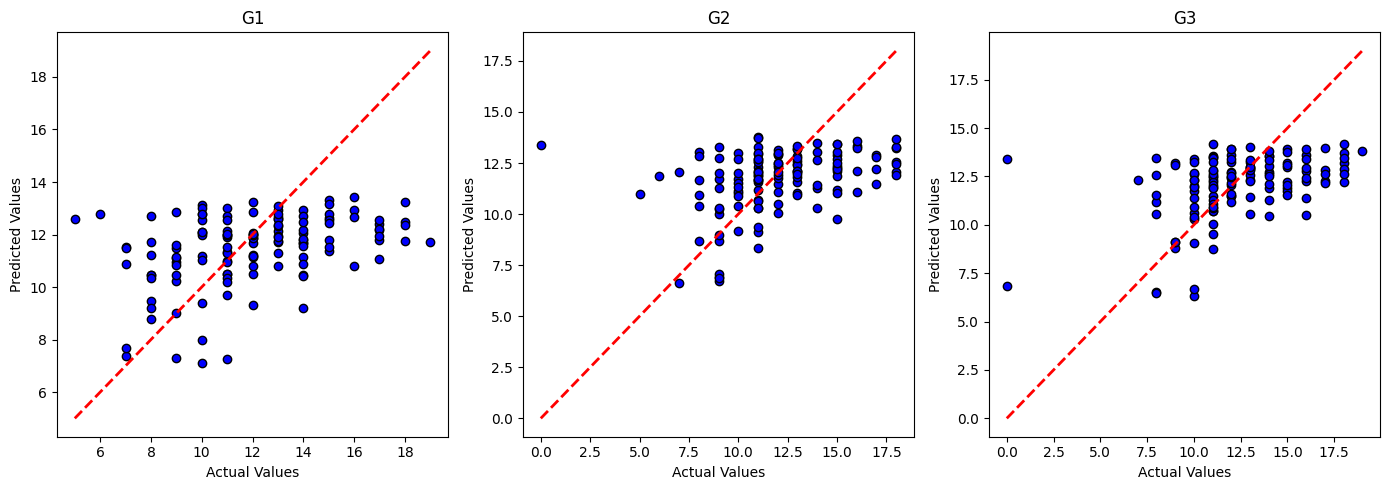

Ridge
Mean Squared Error: 7.889429054306021
R^2 Score: 0.13266661378521294 



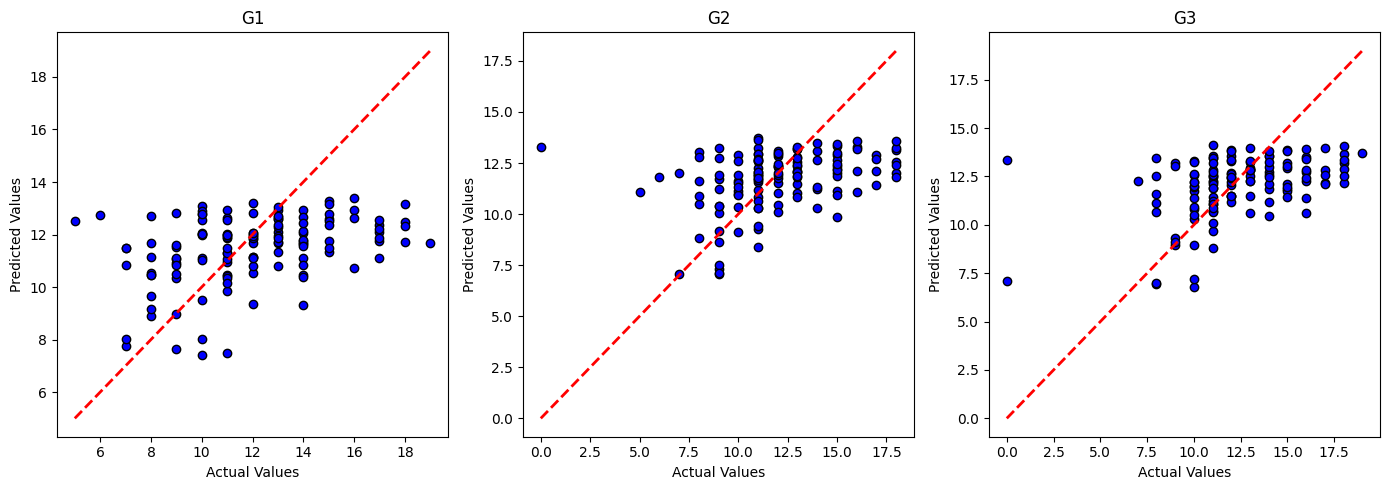

Lasso
Mean Squared Error: 7.838825402503228
R^2 Score: 0.13837428939450472 



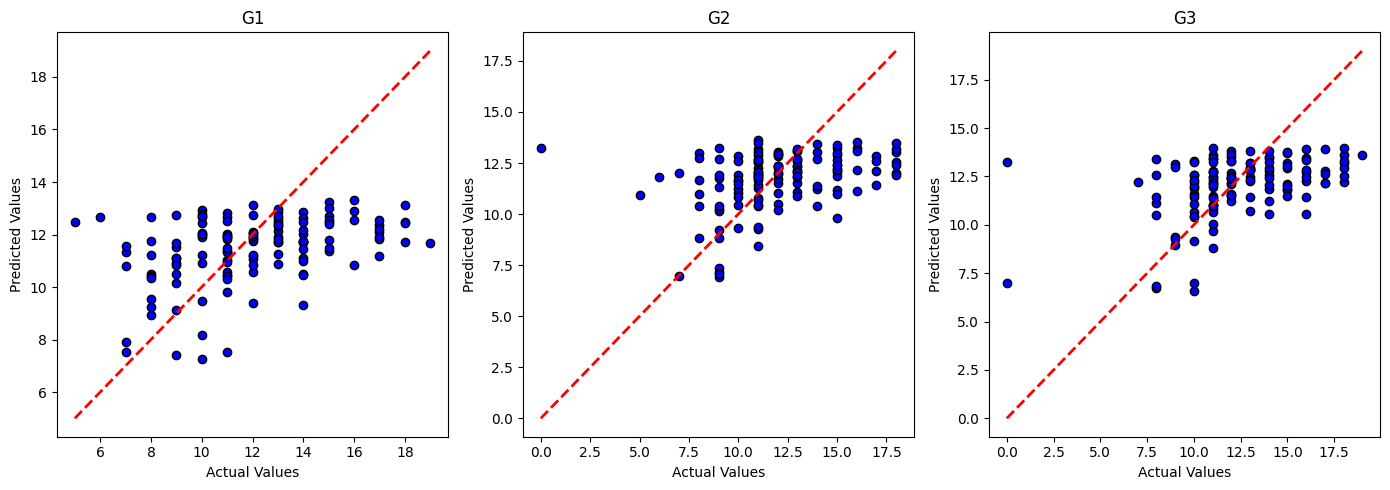

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_and_plot(model):
    # Predict on the test data
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__}")
    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2, "\n")

    # Plot the results using scatter plot for each column
    fig, axs = plt.subplots(1, len(y.columns), figsize=(14, 5))
    for i, column in enumerate(y.columns):
        axs[i].scatter(y_test[column], y_pred[:, i], color='blue', edgecolor='k', alpha=1)
        axs[i].plot([y_test[column].min(), y_test[column].max()], 
                    [y_test[column].min(), y_test[column].max()], 
                    color='red', linestyle='--', linewidth=2, label='Ideal Fit')
        axs[i].set_xlabel('Actual Values')
        axs[i].set_ylabel('Predicted Values')
        axs[i].set_title(f'{column}')

    plt.tight_layout()
    plt.show()

evaluate_and_plot(linear_reg)
evaluate_and_plot(ridge_reg_best)
evaluate_and_plot(lasso_reg_best)

## Tree-based ML Models

These models use a tree-like structure where decisions are made at each node, branching out into different paths based on feature values. **The models can be used for Regression and Classification** tasks. Here, we introduce the use of 5 Models in Regression.  
A dataset is used here from UCI ML Library. This dataset is actually a classification dataset which has the task of classifying people based on obesity level. However, data processing steps were performed to chage **the task to predict the weight of a person based on their obesity level and several other features**.   
*Readers try to perform the classification using these tree-based models*  

The used models are as follow:
1. Decision Trees: Using DecisionTreeClassifier or DecisionTreeRegressor for classification or regression tasks, respectively.
2. Bagging (Bootstrap Aggregation): Using BaggingClassifier or BaggingRegressor.
3. Random Forest: Using RandomForestClassifier or RandomForestRegressor.
4. Boosting:
    * AdaBoost: Useing AdaBoostClassifier or AdaBoostRegressor.
    * Gradient Boosting: Useing GradientBoostingClassifier or GradientBoostingRegressor.

Note that <font color="blue"> Decision Tree is the only model that is a basic tree model. The rest are Ensemble Models that uses multiple models for predictions (which are often decision trees) </font>  

Ten models have been implemented bellow 5 models without tuning parameters and other 5 models with tuning parameters uing Grid Search. 

### Load and prepare the data

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
obesityEstimation = fetch_ucirepo(id=544)  
X = obesityEstimation.data.features 
y = obesityEstimation.data.targets 

""" We will consider a regression problem in which we will predict the weight. 
    We will make adjustment in the database by making the target variable 'Weight'
    We will move the categorical variable 'NObeyesdad' to the predictor variables"""

# Move 'Weight' Column from X to y
y = y.copy()  # Make a copy of y
y.loc[:, 'Weight'] = X['Weight'] # Extract the 'Weight' column from X and add it to y
X = X.drop(columns='Weight') # Remove the 'Weight' column from X

# Move 'NObeyesdad' from y to X
X = X.copy()
X.loc[:, 'NObeyesdad'] = y['NObeyesdad']
y = y.drop(columns='NObeyesdad')

# Apply one-hot encoding to categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# print Dataset Characteristics
print("Name:", obesityEstimation.metadata['name'], "\nlink:", obesityEstimation.metadata['repository_url'])
print(f"We have {X.shape[0]} rows with {X.shape[1]} features variables and {y.shape[1]} target variable")
print("Features: ", X.columns)
print("Targets: ", y.columns)

Name: Estimation of Obesity Levels Based On Eating Habits and Physical Condition  
link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition
We have 2111 rows with 28 features variables and 1 target variable
Features:  Index(['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')
Targets:  Index(['Weight'], dtype='object')


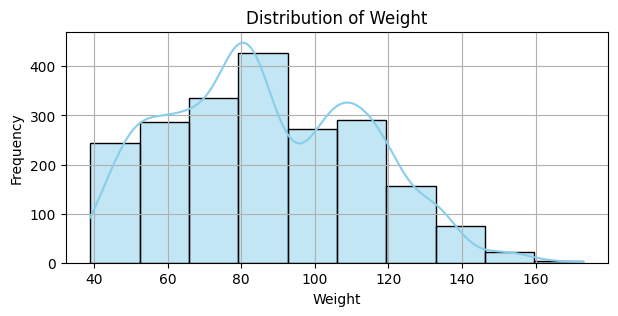

In [8]:
# Plot the distribution of 'Weight' column using a histogram
plt.figure(figsize=(7, 3))
sns.histplot(y['Weight'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit The models 

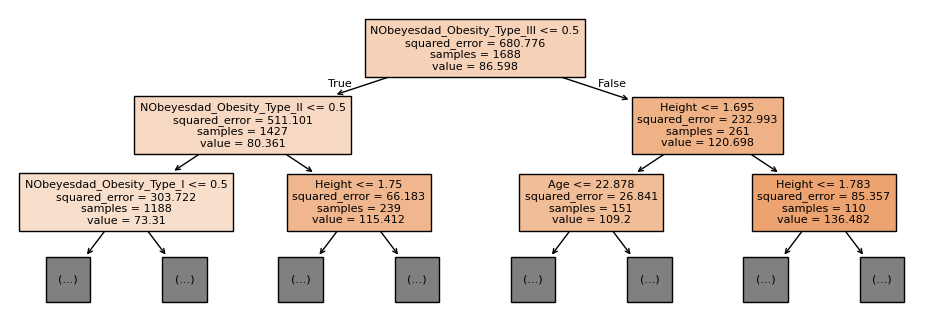

In [10]:
# Fit Simple Descision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model_DTR = DecisionTreeRegressor(random_state=42)

# Train the model
model_DTR.fit(X_train, y_train)

# Make predictions
y_pred_DTR = model_DTR.predict(X_test)

# Plot the decision tree (Because our features are 28, the tree is too complex. Thus, only a depth of 2 is shown bellow)
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 4))
plot_tree(model_DTR, filled=True, feature_names=X_train.columns, fontsize=8, max_depth=2) # increase the depth to see more
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}


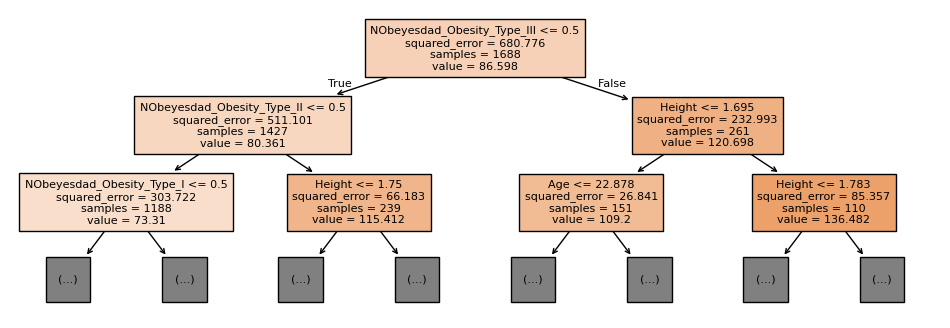

In [11]:
# Tune the parameters of Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model_DTR_tuned = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [8, 9, 10],
    'min_samples_split': [8, 9, 10],
    'min_samples_leaf': [1, 2, 3],
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model_DTR_tuned, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred_DTR_tuned = best_model.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)

# Plot the decision tree (Because our features are 28, the tree is too complex. Thus, only a depth of 2 is shown bellow)
plt.figure(figsize=(12, 4))
plot_tree(best_model, filled=True, feature_names=X_train.columns, fontsize=8, max_depth=2) # increase the depth to see more
plt.show()

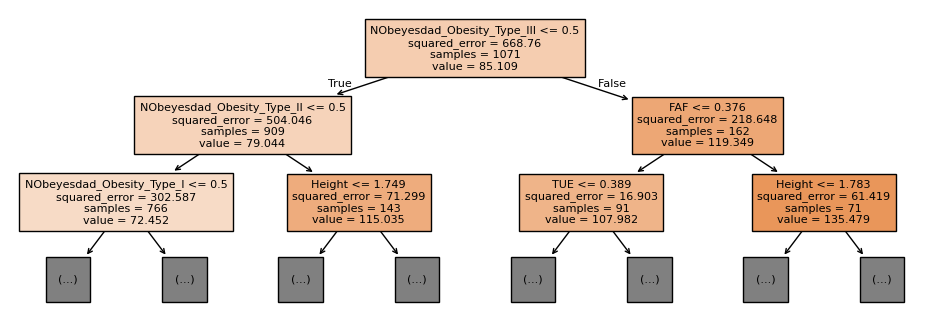

In [12]:
# Fit the Bagging Regressor Model 
from sklearn.ensemble import BaggingRegressor
y_train_flat = np.ravel(y_train)

# Initialize the Bagging Regressor with default base estimator
model_Bagging = BaggingRegressor(n_estimators=50, random_state=42)

# Train the Bagging model
model_Bagging.fit(X_train, y_train_flat)

# Make predictions
y_pred_Bagging = model_Bagging.predict(X_test)

""" Because Bagging Regressor is not a model on itself, we will extract the first base estimator and plot it 
    Bagging itselt can use Decision Trees, Linear Models, SVM, and other models as estimators """

# plot the tree
base_tree = model_Bagging.estimators_[0]  # Access the first base estimator
plt.figure(figsize=(12, 4))
plot_tree(base_tree, filled=True, feature_names=X_train.columns, fontsize=8, max_depth=2) # increase the depth to see more
plt.show()

In [13]:
# Fit the Bagging Regressor Model with tunning parameters
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [90, 95],
    'max_samples': [0.8, 0.9],
    'max_features': [0.9, 1.0],
}

# Initialize the Bagging Regressor
model_Bagging_tuned = BaggingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_Bagging_tuned, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train_flat)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_Bagging_tuned = best_model.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 90}


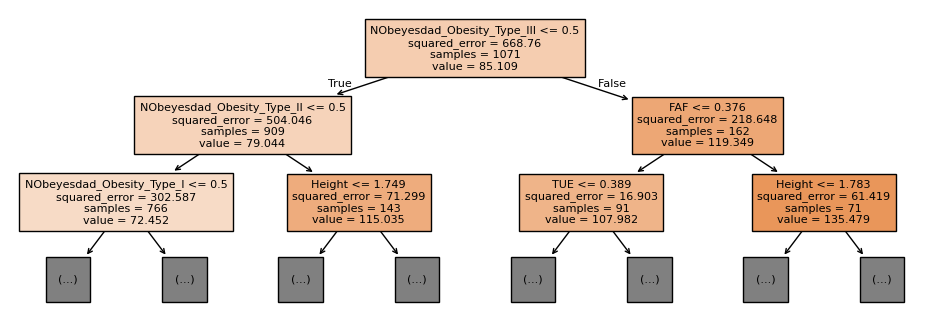

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForest Regressor
model_RandomForest = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the RandomForest model
model_RandomForest.fit(X_train, y_train_flat)

# Make predictions
y_pred_RandomForest = model_RandomForest.predict(X_test)

# Plot the tree
base_tree = model_RandomForest.estimators_[0]  # Access the first base estimator
plt.figure(figsize=(12, 4))
plot_tree(base_tree, filled=True, feature_names=X_train.columns, fontsize=8, max_depth=2) # increase the depth to see more
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the RandomForest Regressor
model_RandomForest_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_RandomForest_tuned, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train_flat)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_RandomForest_tuned = best_model.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


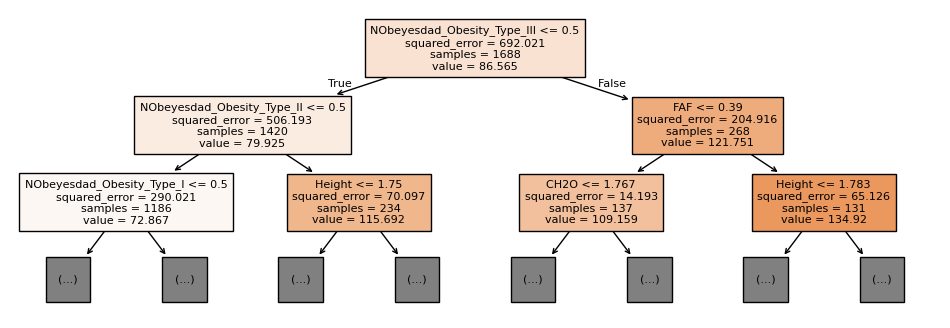

In [16]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor without specifying a base model
model_AdaBoost = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the AdaBoost model
model_AdaBoost.fit(X_train, y_train_flat)

# Make predictions
y_pred_AdaBoost = model_AdaBoost.predict(X_test)

# Plot the tree
base_tree = model_AdaBoost.estimators_[0]  # Access the first base estimator
plt.figure(figsize=(12, 4))
plot_tree(base_tree, filled=True, feature_names=X_train.columns, fontsize=8, max_depth=2) # increase the depth to see more
plt.show()

In [17]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 350],
    'learning_rate': [1.4, 1.5, 1.6],
    'loss': ['square', 'exponential']
}

# Initialize the AdaBoost Regressor
model_AdaBoost_tuned = AdaBoostRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_AdaBoost_tuned, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train_flat)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_AdaBoost_tuned = best_model.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 300}


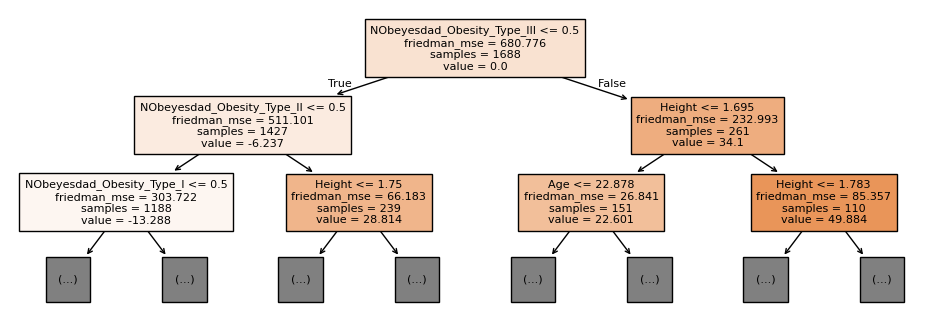

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
model_GradientBoosting = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Train the Gradient Boosting model
model_GradientBoosting.fit(X_train, y_train_flat)

# Make predictions
y_pred_GradientBoosting = model_GradientBoosting.predict(X_test)

# Plot the first tree in the Gradient Boosting model
base_tree = model_GradientBoosting.estimators_[0, 0]  # Access the first base estimator
plt.figure(figsize=(12, 4))
plot_tree(base_tree, filled=True, feature_names=X_train.columns, fontsize=8, max_depth=2) # Increase the depth to see more
plt.show()

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.2],
    'max_depth': [5],
    'min_samples_split': [9, 10],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Regressor
model_GradientBoosting_tuned = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_GradientBoosting_tuned, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train_flat)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_GradientBoosting_tuned = best_model.predict(X_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 100}


### Evaluate the Ten Models

In [20]:
# Define lists to evaluate 
Models = [model_DTR, model_DTR_tuned, model_Bagging, model_Bagging_tuned, model_RandomForest, model_RandomForest_tuned,
         model_AdaBoost, model_AdaBoost_tuned, model_GradientBoosting, model_GradientBoosting_tuned]
y_preds = [y_pred_DTR, y_pred_DTR_tuned, y_pred_Bagging, y_pred_Bagging_tuned, y_pred_RandomForest, 
           y_pred_RandomForest_tuned, y_pred_AdaBoost, y_pred_AdaBoost_tuned, y_pred_GradientBoosting, 
           y_pred_GradientBoosting_tuned]

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(models, y_pred_list, y_test):
    results = []
    # Dictionary to handle model names for tuning
    seen_model_names = {}
    for model, y_pred in zip(models, y_pred_list):
        model_name = model.__class__.__name__
        
        if model_name in seen_model_names:
            seen_model_names[model_name] += 1
            model_name = f"{model_name} (tuned)"
        else:
            seen_model_names[model_name] = 1
            
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model Name': model_name,
            'Mean Squared Error': mse,
            'R^2 Score': r2
        })
    results_df = pd.DataFrame(results)
    return results_df

results_df = evaluate_models(Models, y_preds, y_test)

best_mse_index = results_df['Mean Squared Error'].idxmin()
best_mse_model = results_df.loc[best_mse_index, 'Model Name']
best_mse_score = results_df.loc[best_mse_index, 'Mean Squared Error']
print(f"Best MSE Score: {best_mse_score} for {best_mse_model} model")

best_R_index = results_df['R^2 Score'].idxmax()
best_R_model = results_df.loc[best_R_index, 'Model Name']
best_R_score = results_df.loc[best_R_index, 'R^2 Score']
print(f"Best R^2 Score: {best_R_score} for {best_R_model} model\n")

# Print the result
results_df

Best MSE Score: 8.028446320683866 for RandomForestRegressor (tuned) model
Best R^2 Score: 0.9886139244945426 for RandomForestRegressor (tuned) model



,Model Name,Mean Squared Error,R^2 Score
0,DecisionTreeRegressor,11.212683,0.984098
1,DecisionTreeRegressor (tuned),10.426046,0.985214
2,BaggingRegressor,8.312479,0.988211
3,BaggingRegressor (tuned),8.166764,0.988418
4,RandomForestRegressor,8.149323,0.988442
5,RandomForestRegressor (tuned),8.028446,0.988614
6,AdaBoostRegressor,93.838188,0.866917
7,AdaBoostRegressor (tuned),64.599167,0.908384
8,GradientBoostingRegressor,33.535300,0.952440
9,GradientBoostingRegressor (tuned),11.701424,0.983405


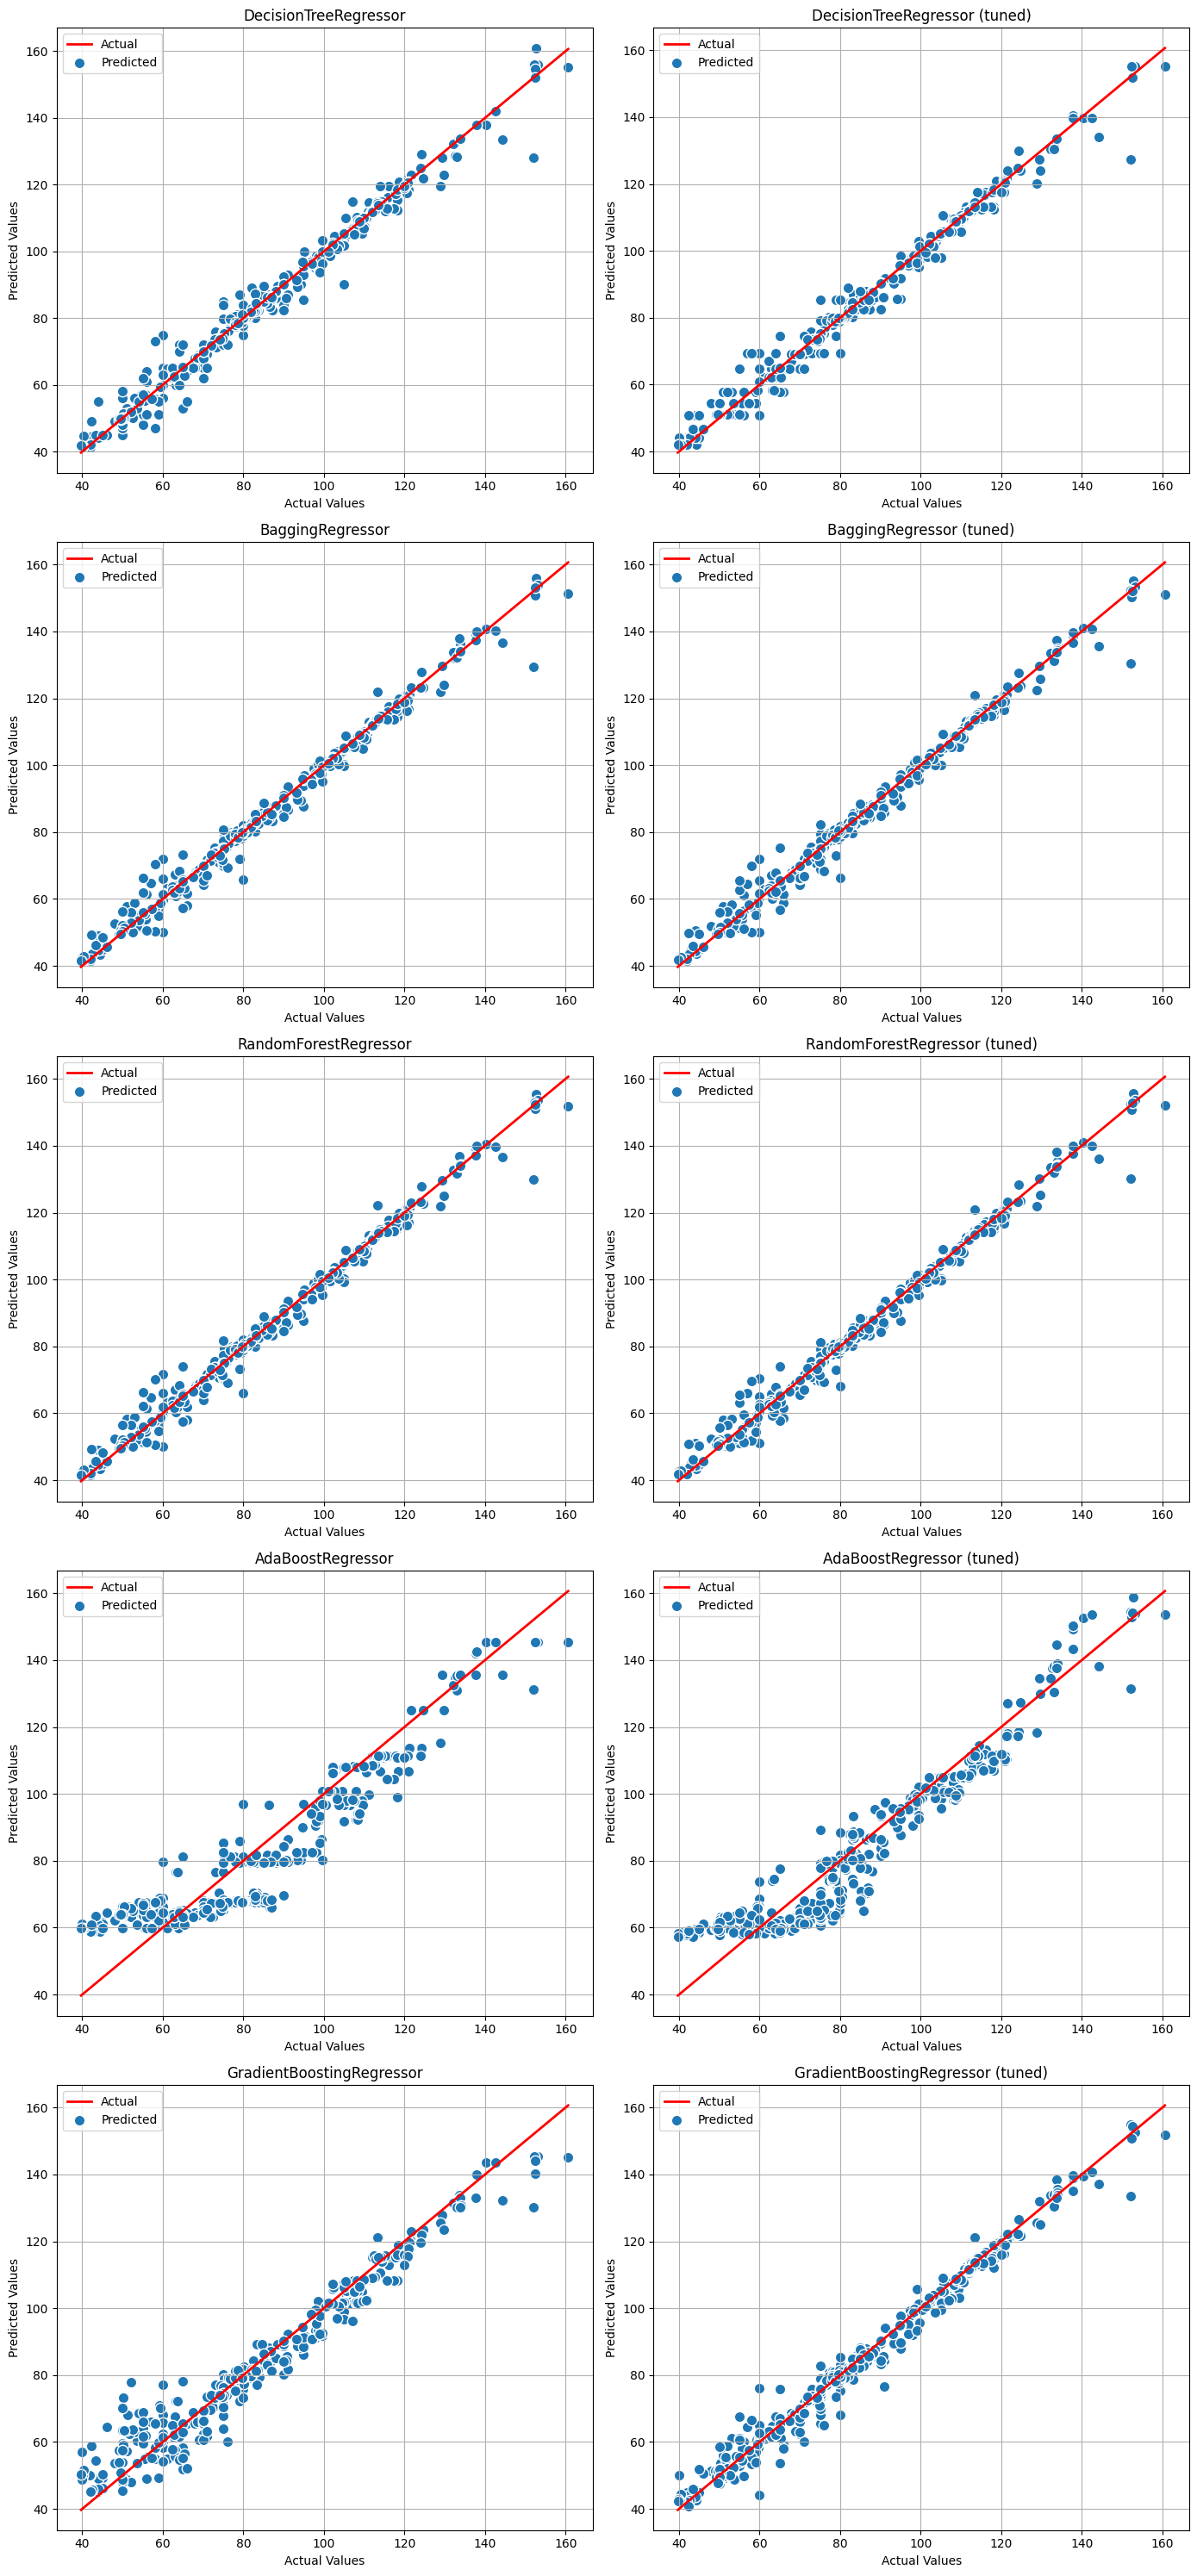

In [22]:
def plot_actual_vs_predicted(models, y_pred_lists):
    num_plots = len(y_pred_lists)
    num_rows = (num_plots + 1) // 2
    plt.figure(figsize=(14, 6 * num_rows))

    seen_model_names = {}
    for i, (model,  y_pred) in enumerate(zip(models, y_pred_lists)):
        y_test_flat = np.ravel(y_test)
        y_pred_flat = np.ravel(y_pred)
        plt.subplot(num_rows, 2, i + 1)
        plt.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat), max(y_test_flat)], 'r-', linewidth=2, label="Actual")
        plt.scatter(y_test_flat, y_pred_flat, edgecolors='w', s=80, label="Predicted")
    
        model_name = model.__class__.__name__
        if model_name in seen_model_names:
            seen_model_names[model_name] += 1
            model_name = f"{model_name} (tuned)"
        else:
            seen_model_names[model_name] = 1
            
        plt.title(model_name)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(Models, y_preds)

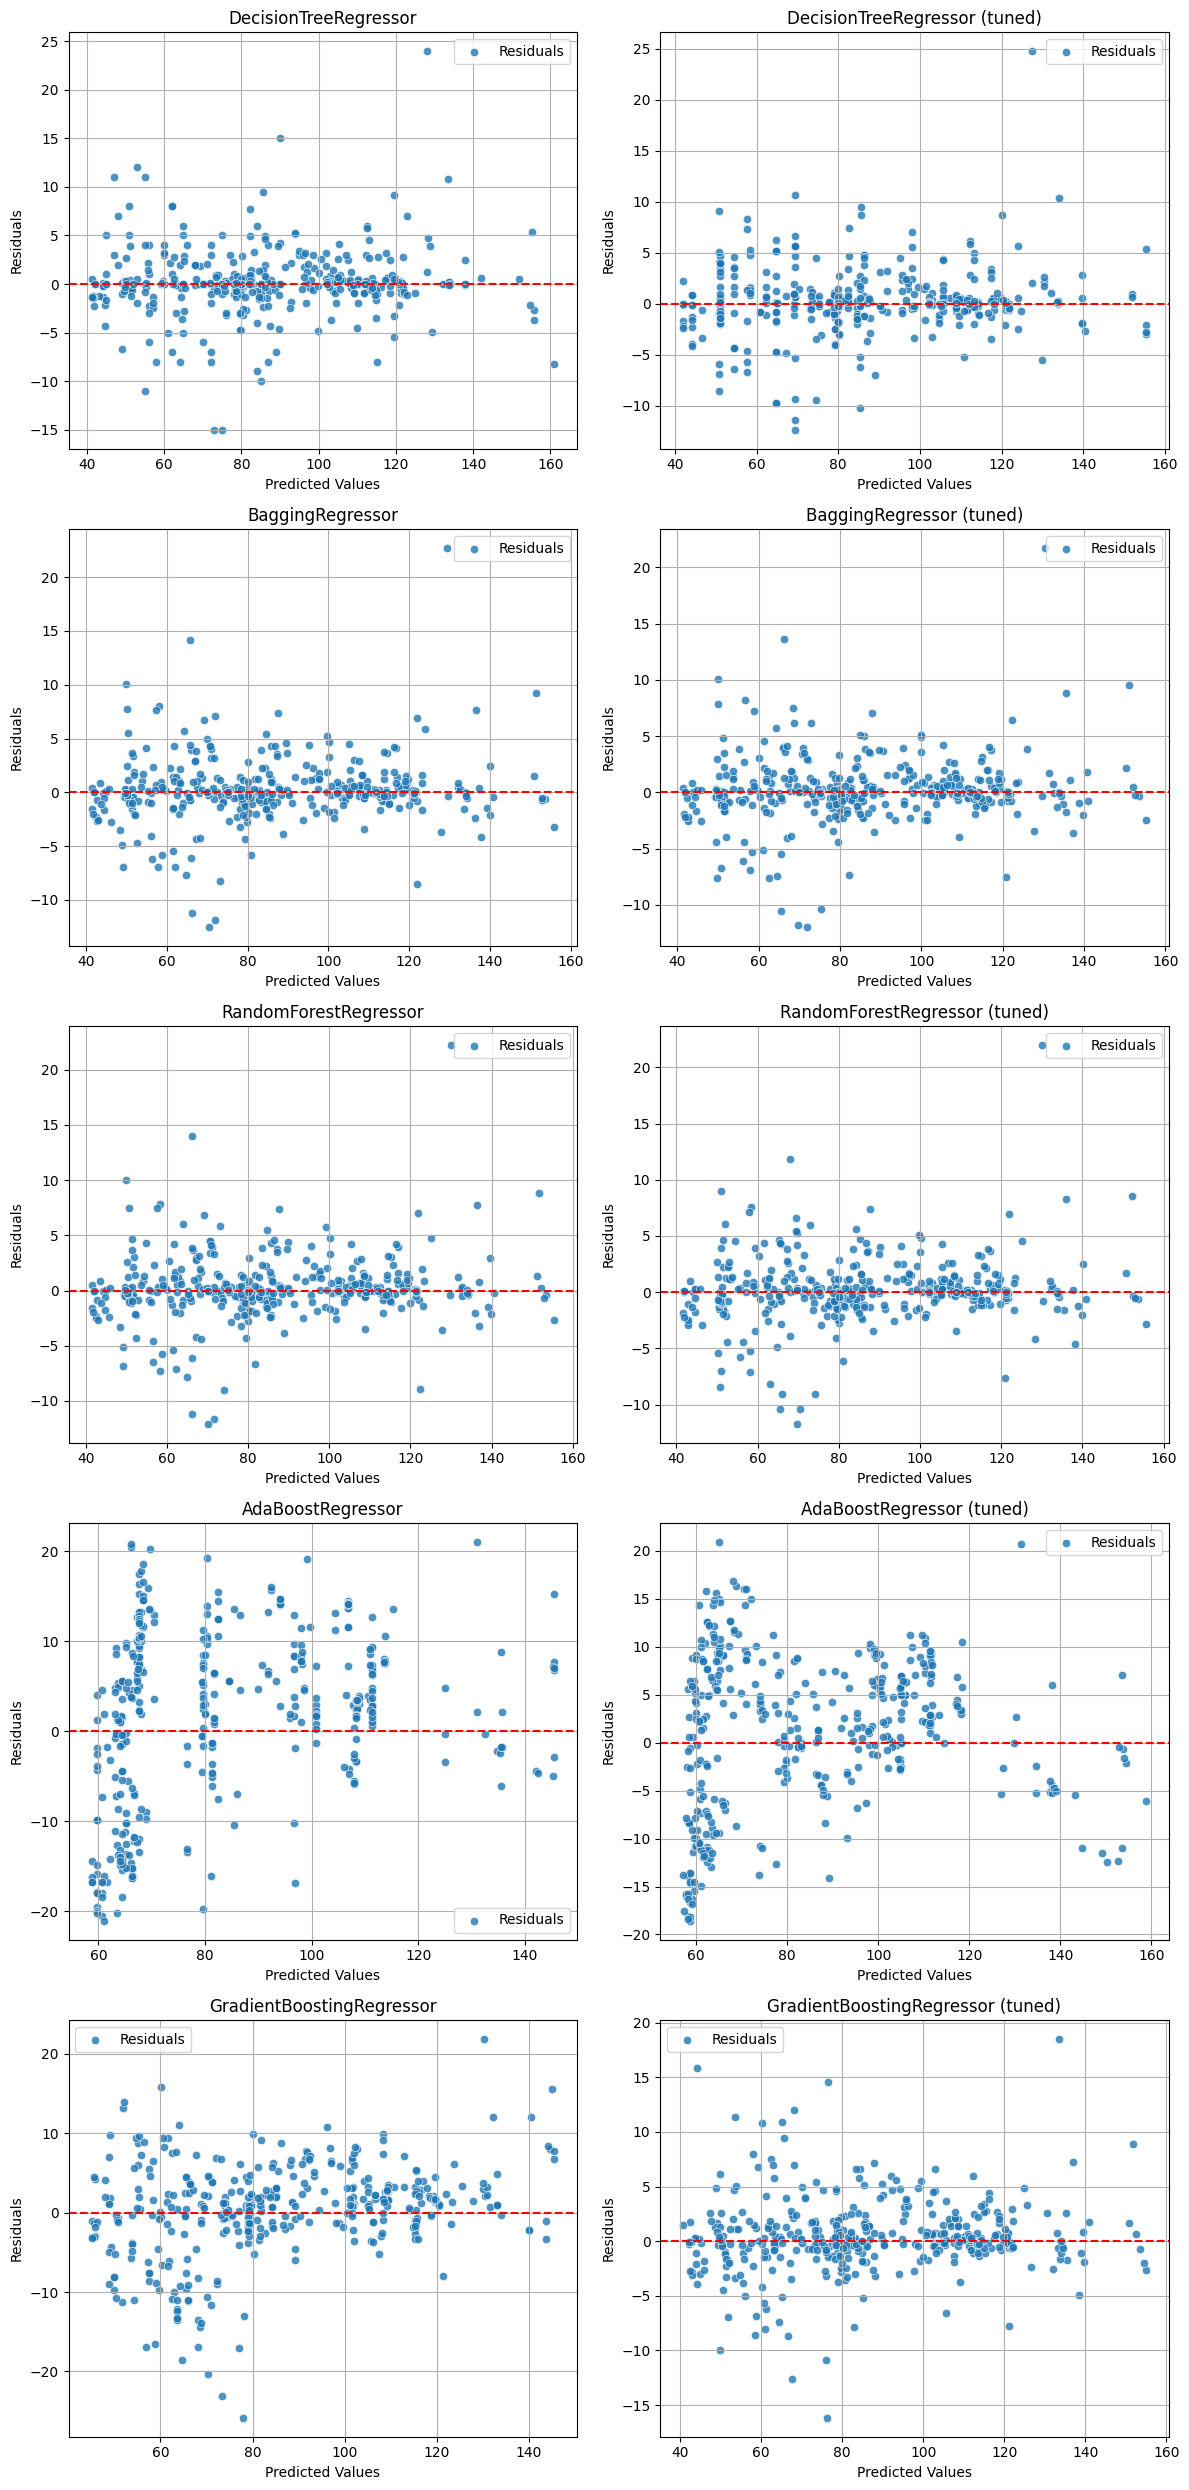

In [23]:
def plot_residuals(models, y_pred_lists):
    num_plots = len(y_pred_lists)
    num_rows = (num_plots + 1) // 2
    plt.figure(figsize=(12, 5 * num_rows))

    seen_model_names = {}
    for i, (model, y_pred) in enumerate(zip(models, y_pred_lists)):
        y_test_flat = np.ravel(y_test)
        y_pred_flat = np.ravel(y_pred)
        residuals = y_test_flat - y_pred_flat
        
        plt.subplot(num_rows, 2, i + 1)
        sns.scatterplot(x=y_pred_flat, y=residuals, alpha=0.8, label="Residuals")
        plt.axhline(0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        
        model_name = model.__class__.__name__
        if model_name in seen_model_names:
            seen_model_names[model_name] += 1
            model_name = f"{model_name} (tuned)"
        else:
            seen_model_names[model_name] = 1
            
        plt.title(model_name)
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_residuals(Models, y_preds)

## Artificial Neural Networks (ANNs)

**Artificial Neural Networks (ANNs)** are networks that consist of a few layers of neurons (nodes), typically including an input layer, one or two hidden layers, and an output layer. They are simpler and more suited for straightforward tasks like recognizing handwritten digits or basic pattern recognition. ANNs generally require less time to train compared to DNNs.  

Deep Neural Networks (DNNs) are a subset of ANNs but with many more hidden layers, sometimes even hundreds. This increased depth allows them to learn more complex patterns and representations. Although Scikit-learn a powerful library for many machine learning tasks, it is not specifically designed for deep learning. Thus, only ANNs will be introduced here.  

In Scikit-learn, we have `MLPRegressor` and `MLPClassifier` models to build ANNs. In this example, we will use the MLPRegressor.  

In MLPRegressor, the number of input neurons corresponds to the number of features in the dataset, and the output layer typically has one neuron for regression tasks. The architecture of the network, including the number of hidden layers and the number of neurons in each hidden layer, can be adjusted to improve performance based on the complexity of the task.

In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 

# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
y = y['area'].astype(float)

print("Name:", forest_fires.metadata['name'], "\nlink:", forest_fires.metadata['repository_url'])
print(f"We have {X.shape[0]} rows with {X.shape[1]} features variables and {1} target variable")
print("Features: ", X.columns)
print("Targets: ", 'area')

Name: Forest Fires 
link: https://archive.ics.uci.edu/dataset/162/forest+fires
We have 517 rows with 12 features variables and 1 target variable
Features:  Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')
Targets:  area


### Data Preprocessing 

In [25]:
""" Because we have both month and day columns of type string, we will map them using the bellow order
    into integers"""

# Map the values
day_mapping = {day: i for i, day in enumerate(['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])}
month_mapping = {month: i for i, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                     'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])}

# Apply the mapping
Xnew = X.copy()
Xnew['day'] = X['day'].map(day_mapping)
Xnew['day'] = Xnew['day'].astype(int)
Xnew['month'] = X['month'].map(month_mapping)
Xnew['month'] = Xnew['month'].astype(int)

X = Xnew
print(X.dtypes)

X          int64
Y          int64
month      int32
day        int32
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
dtype: object


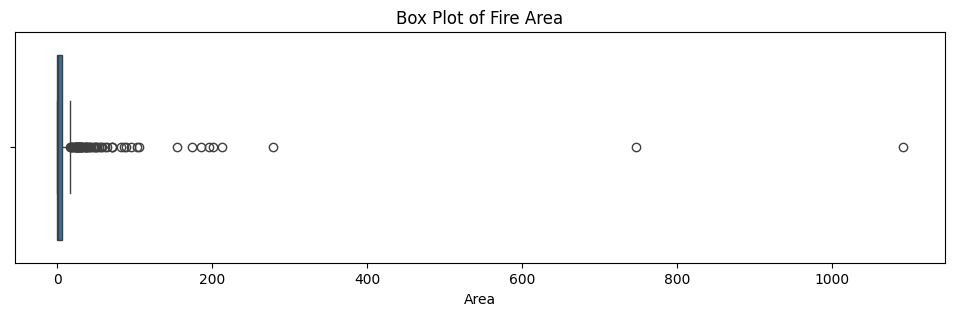

In [26]:
# Make box plot to see how target data is distibuted 

""" You can find that this data has extreme outlineres"""
plt.figure(figsize=(12, 3))
sns.boxplot(x=y)
plt.title('Box Plot of Fire Area')
plt.xlabel('Area')
# plt.xlim(-5, 50) Zoom-in to the box if needed
plt.show()

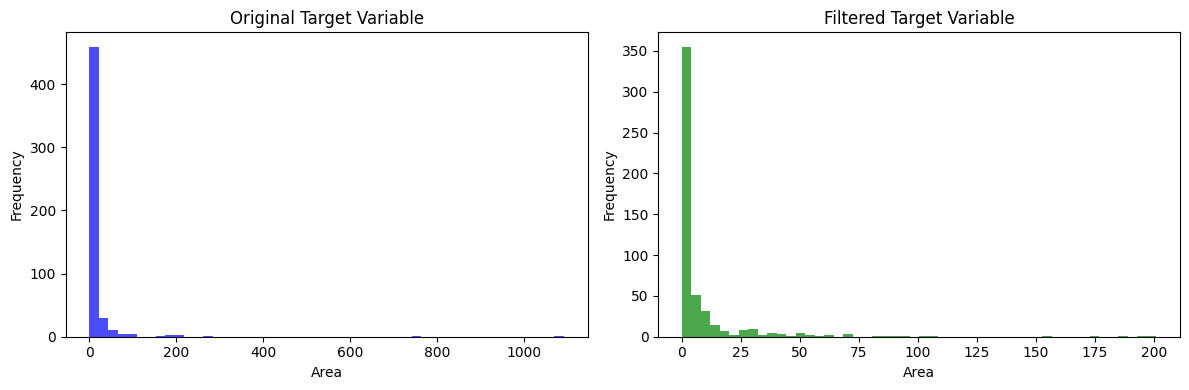

In [27]:
""" We have used Z-scores to filter out the outliner. 
    We have filtered out outliners wiht z-score above 3"""
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(y)
abs_z_scores = np.abs(z_scores)

# Filter out outliers
filtered_entries = abs_z_scores < 3
X_filtered = X[filtered_entries]
y_filtered = y[filtered_entries]

# Plot original and filtered target variable distributions
plt.figure(figsize=(12, 4))

# Original data
plt.subplot(1, 2, 1)
plt.hist(y, bins=50, color='blue', alpha=0.7)
plt.title('Original Target Variable')
plt.xlabel('Area')
plt.ylabel('Frequency')

# Filtered data
plt.subplot(1, 2, 2)
plt.hist(y_filtered, bins=50, color='green', alpha=0.7)
plt.title('Filtered Target Variable')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

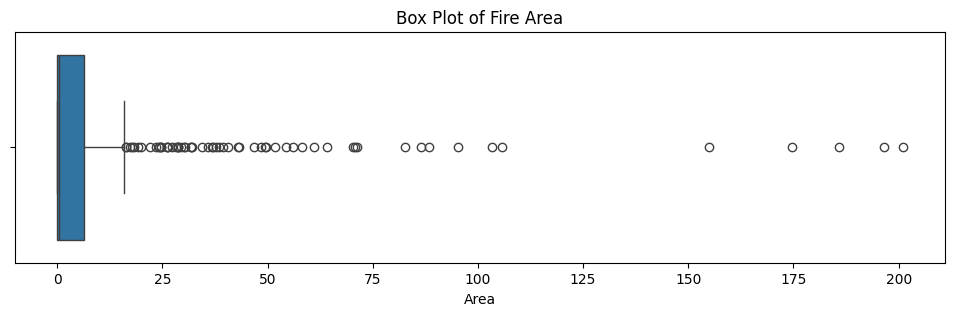

In [28]:
# Make box plot to see how target data is distibuted 
y = y_filtered # replace y value
X = X_filtered # replace x values (that are matched with the outliners)
plt.figure(figsize=(12, 3))
sns.boxplot(x=y)
plt.title('Box Plot of Fire Area')
plt.xlabel('Area')
# plt.xlim(-5, 50) Zoom-in to the box if needed
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fit and Evaluate the Model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Define the model with a placeholder for hidden_layer_sizes
model = MLPRegressor(max_iter=1000, random_state=42)

# Define the parameter grid with more variations for hidden_layer_sizes
param_grid = {
    'hidden_layer_sizes': [ # Make variation as needed for number of layers and neuron 
        (32, 32, 32),
        (100, 100, 100),
    ],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam', 'lbfgs'],
}

# Initialize the grid search
grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv=5, 
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(X_test)

Best parameters found:  {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}
Best cross-validation score (MSE):  614.9948216171172


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 190.23048524587696
R^2 Score: -0.0821206239545107


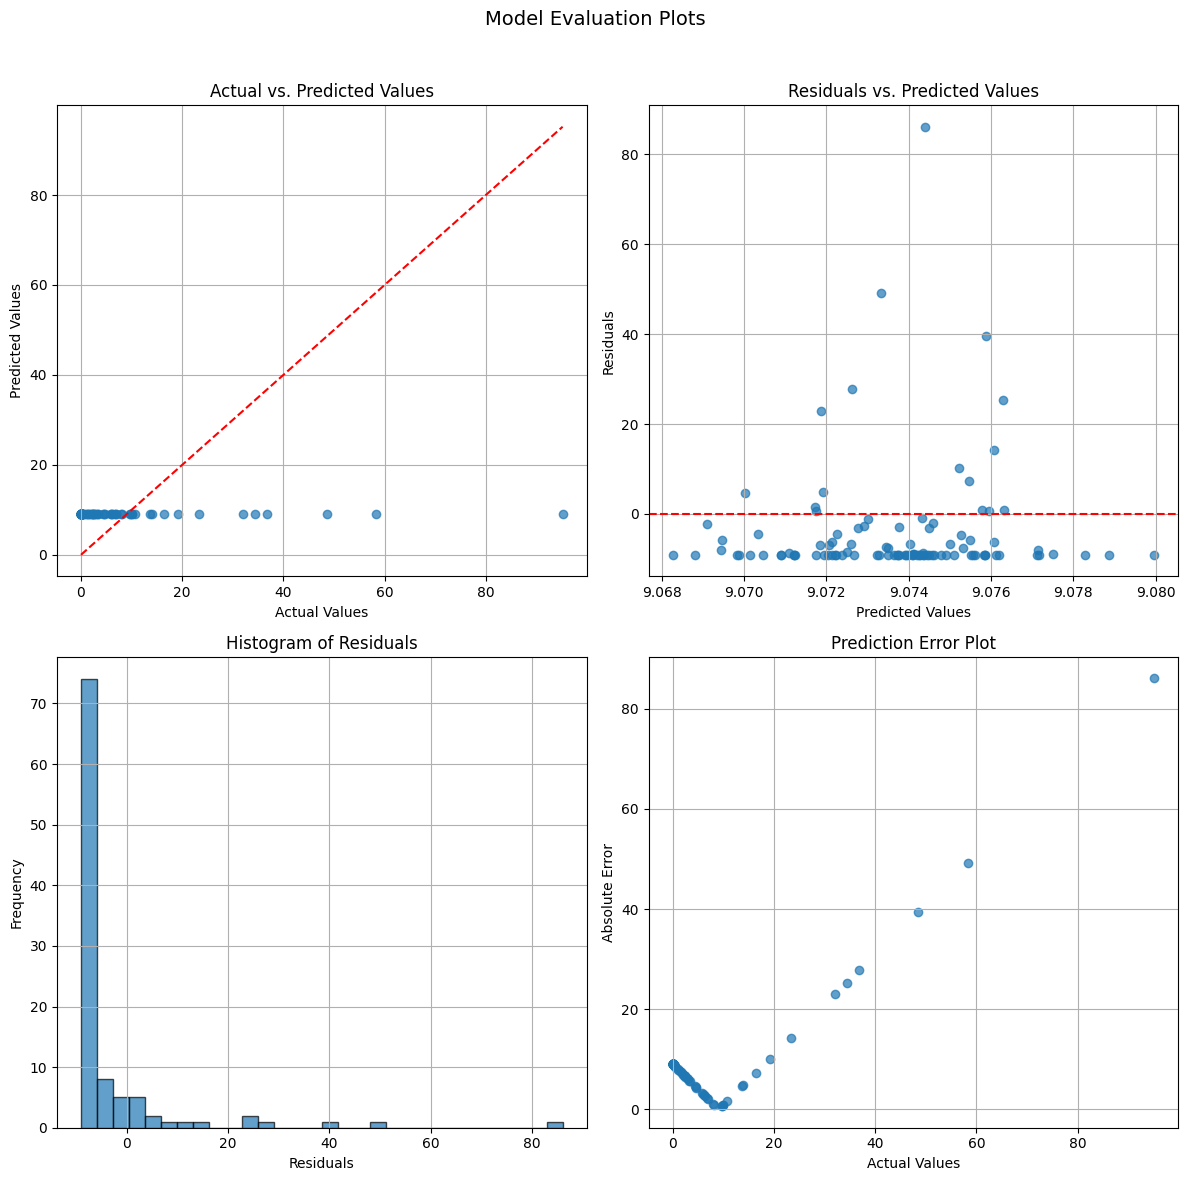

In [32]:
# Make plots for evaluation

# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Model Evaluation Plots', fontsize=14)

# 1. Scatter Plot of Actual vs. Predicted Values
axs[0, 0].scatter(y_test, y_pred, alpha=0.7)
axs[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Predicted Values')
axs[0, 0].set_title('Actual vs. Predicted Values')
axs[0, 0].grid(True)

# 2. Residual Plot
residuals = y_test - y_pred
axs[0, 1].scatter(y_pred, residuals, alpha=0.7)
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_xlabel('Predicted Values')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].set_title('Residuals vs. Predicted Values')
axs[0, 1].grid(True)

# 3. Histogram of Residuals
axs[1, 0].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].grid(True)

# 4. Prediction Error Plot
axs[1, 1].scatter(y_test, np.abs(y_test - y_pred), alpha=0.7)
axs[1, 1].set_xlabel('Actual Values')
axs[1, 1].set_ylabel('Absolute Error')
axs[1, 1].set_title('Prediction Error Plot')
axs[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

# Classification Models

## Logistic Regression 

In [33]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
germanCreditCard = fetch_ucirepo(id=144) 

# data (as pandas dataframes)
X = germanCreditCard.data.features 
y = germanCreditCard.data.targets

# Data Preprocessing 
y = y.values.ravel() # Convert y to a 1D array; Note that we just have one target variable 
categorical_columns = X.select_dtypes(include=['object']).columns # Check if there are any string (object) columns
# Apply one-hot encoding to categorical columns; This will increate number of columns from 20 to 48. 
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True) 

print("Name:", germanCreditCard.metadata['name'], "\nlink:", germanCreditCard.metadata['repository_url'])
print(f"We have {X.shape[0]} rows with {X.shape[1]} features variables and {1} target variable")
print("Features: ", X.columns)
print("Targets: ", "Class")

""" In this data, 1 = Good,  2 = Bad. 
    We will convert it to binary as: 1 = Good,  0 = Bad"""

# Relable the y data to binary 
y = np.where(y == 2, 0, 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but recommended for logistic regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Name: Statlog (German Credit Data) 
link: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
We have 1000 rows with 48 features variables and 1 target variable
Features:  Index(['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13',
       'Attribute16', 'Attribute18', 'Attribute1_A12', 'Attribute1_A13',
       'Attribute1_A14', 'Attribute3_A31', 'Attribute3_A32', 'Attribute3_A33',
       'Attribute3_A34', 'Attribute4_A41', 'Attribute4_A410', 'Attribute4_A42',
       'Attribute4_A43', 'Attribute4_A44', 'Attribute4_A45', 'Attribute4_A46',
       'Attribute4_A48', 'Attribute4_A49', 'Attribute6_A62', 'Attribute6_A63',
       'Attribute6_A64', 'Attribute6_A65', 'Attribute7_A72', 'Attribute7_A73',
       'Attribute7_A74', 'Attribute7_A75', 'Attribute9_A92', 'Attribute9_A93',
       'Attribute9_A94', 'Attribute10_A102', 'Attribute10_A103',
       'Attribute12_A122', 'Attribute12_A123', 'Attribute12_A124',
       'Attribute14_A142', 'Attribute14_A143', 'Attrib

### Logistic Regression Model (All Features Included)
Here, we have included all 48 predictor variables.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict class labels on the test set
y_pred = model.predict(X_test)

# Output the accuracy and a detailed classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 79.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.59      0.63        59
           1       0.84      0.88      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.79      0.80      0.79       200



### Logistic Regression (Features with IV higher than 0.02)
**Information Value (IV)** is a crucial metric in feature selection, especially in the context of logistic regression, which is commonly used in machine learning for binary classification problems.  
- IV < 0.02: Useless for prediction  
- 0.02 ≤ IV < 0.1: Weak predictor  
- 0.1 ≤ IV < 0.3: Medium predictor  
- 0.3 ≤ IV < 0.5: Strong predictor  
- IV ≥ 0.5: Suspicious (possibly overfitting)
 
In the bellow code, all features with IV less than 0.02 are filtered out so that we can compare it with the previous model. 

In [35]:
# Calculate Information Value (IV)
def IV_calc(data, target):
    """
    Calculate the Information Value (IV) for each feature in the dataset relative to the target variable.

    Parameters:
    - data (pd.DataFrame): The dataset containing features and the target variable.
    - target (str): The target variable column name.

    Returns:
    - pd.DataFrame: DataFrame containing IV calculations for each feature.
    """
    if target not in data.columns:
        raise KeyError(f"Target '{target}' is not in the DataFrame columns")
    
    # Ensure target column is numeric
    if not np.issubdtype(data[target].dtype, np.number):
        data[target] = data[target].astype(int)
    
    iv_results = []

    for var in data.columns:
        if var == target:
            continue
        
        # If the variable is numeric, bin it into 10 quantiles
        if np.issubdtype(data[var].dtype, np.number):
            data['bin_var'] = pd.qcut(data[var].rank(method='first'), 10, duplicates='drop')
        else:
            data['bin_var'] = data[var]
        
        dataf = data.groupby(['bin_var'], observed=True)[target].agg(['count', 'sum'])
        dataf.columns = ["Total", "bad"]
        dataf["good"] = dataf["Total"] - dataf["bad"]
        dataf["bad_per"] = dataf["bad"] / dataf["bad"].sum()
        dataf["good_per"] = dataf["good"] / dataf["good"].sum()
        
        # To avoid division by zero and logarithm of zero, replace 0 with a very small value
        dataf["good_per"] = dataf["good_per"].replace(0, 1e-10)
        dataf["bad_per"] = dataf["bad_per"].replace(0, 1e-10)

        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"] / dataf["bad_per"])

        iv = dataf["I_V"].sum()  # Summing IV for the feature
        iv_results.append((var, iv))

    iv_df = pd.DataFrame(iv_results, columns=['Feature', 'IV'])
    iv_df = iv_df.sort_values(by='IV', ascending=False).reset_index(drop=True)
    return iv_df

# Fetch dataset
creditData = X.copy()
creditData['targetClass'] = y

# Example usage: Calculate IV for all features relative to the target variable
iv_df = IV_calc(creditData, 'targetClass')
iv_df.head()

,Feature,IV
0,Attribute1_A14,0.583536
1,Attribute2,0.260523
2,Attribute3_A34,0.176473
3,Attribute5,0.113428
4,Attribute13,0.102672


In [36]:
# Using IV defined before, fitler the columns wiht IV less than 0.02. 
low_iv_features = iv_df[iv_df['IV'] < 0.02]['Feature'].tolist()

# Map the feature names to indices
feature_indices_to_drop = [iv_df[iv_df['Feature'] == feature].index[0] for feature in low_iv_features]

# Drop the features from X_train and X_test
X_train_filtered = np.delete(X_train, feature_indices_to_drop, axis=1)
X_test_filtered = np.delete(X_test, feature_indices_to_drop, axis=1)
print(f"After filtering, we have {X_train_filtered.shape[1]} features variables")
df_temp = X.drop(columns=low_iv_features).copy()
print("Features: ", df_temp.columns)
print("Targets: ", "Class")

After filtering, we have 26 features variables
Features:  Index(['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13',
       'Attribute16', 'Attribute18', 'Attribute1_A12', 'Attribute1_A14',
       'Attribute3_A31', 'Attribute3_A34', 'Attribute4_A41', 'Attribute4_A43',
       'Attribute4_A46', 'Attribute6_A63', 'Attribute6_A64', 'Attribute6_A65',
       'Attribute7_A72', 'Attribute7_A74', 'Attribute9_A92', 'Attribute9_A93',
       'Attribute12_A124', 'Attribute14_A143', 'Attribute15_A152',
       'Attribute15_A153', 'Attribute20_A202'],
      dtype='object')
Targets:  Class


In [37]:
# Initialize and train the logistic regression model
model2 = LogisticRegression(random_state=42)
model2.fit(X_train_filtered, y_train)

# Predict class labels on the test set
y_pred_new = model2.predict(X_test_filtered)

# Output the accuracy and a detailed classification report
accuracy = accuracy_score(y_test, y_pred_new)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred_new, zero_division=0))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.37      0.47        59
           1       0.78      0.91      0.84       141

    accuracy                           0.75       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200



### Models Evaluations Using Confusion Matrix and ROC Curve
We have **four possible outcomes in classification** which are:
1. True Positive (TP): The actual data is positive, and the predicted data is also positive.
2. True Negative (TN): The actual data is negative, and the predicted data is also negative.
3. False Positive (FP): The actual data is negative, but the predicted data is positive. This is also known as a Type I error.
4. False Negative (FN): The actual data is positive, but the predicted data is negative. This is also known as a Type II error.

We have also **two error types** which are:
* Type I Error (False Positive): Incorrectly rejecting the null hypothesis when it is actually true. In classification terms, this means predicting positive when the actual class is negative.
* Type II Error (False Negative): Failing to reject the null hypothesis when it is actually false. In classification terms, this means predicting negative when the actual class is positive.

We can use plots to visualize the performance of the Logistic Regression Model using **Confusion Matrix** or **ROC curve**. These two are built based on the concepts of TP, TN, FP, and FN. Refer to additional resources to understand the interpretation of these two plots. 

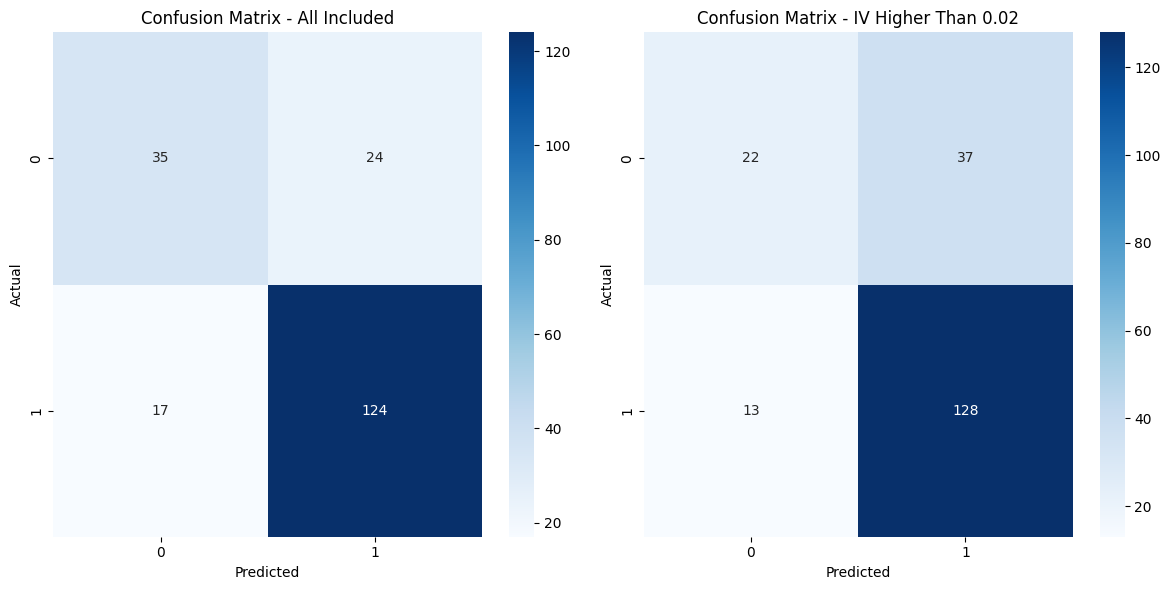

In [38]:
# Calculate confusion matrices
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_new)

# Plotting the confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, ax=ax1)
ax1.set_title('Confusion Matrix - All Included')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_, ax=ax2)
ax2.set_title('Confusion Matrix - IV Higher Than 0.02')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

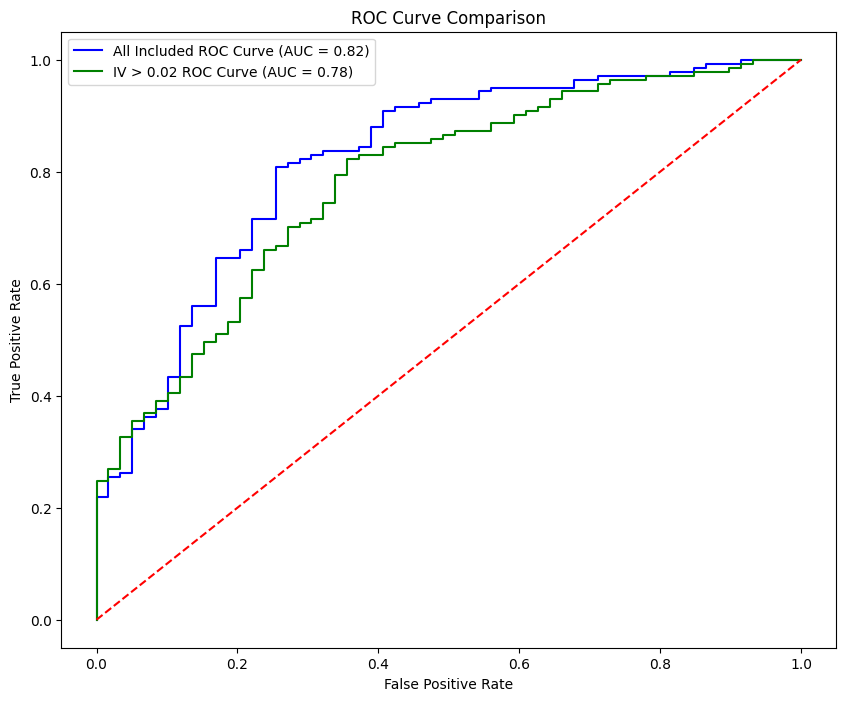

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC curve for Model 1
y_probs1 = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Model 1
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
auc1 = roc_auc_score(y_test, y_probs1)

# Predict probabilities for ROC curve for Model 2
y_probs2 = model2.predict_proba(X_test_filtered)[:, 1]

# Calculate ROC curve and AUC for Model 2
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
auc2 = roc_auc_score(y_test, y_probs2)

# Plot ROC curves for both models
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='blue', label=f'All Included ROC Curve (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', label=f'IV > 0.02 ROC Curve (AUC = {auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

""" Note that, the more the curve goes higher than the red line, the better the model perform and vise versa.""";

We can see that *The performance of the 26 features almost matches the performance the 48 features.*  
So, IV is too useful for applications that involve exclusion of variables. 

## Randome Forest

Tree-based model were introduced before with regression task. We have stated that tree-based model can be used for both regression and classificaiton. Here, the goal here is to devolop a deeper understanding of Random Forest and features selection. Here, we can see that how Gini Importance parameter can be used to exclude parameters that has slight contribution to the model and we will compare both results. 

In [40]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
germanCreditCard = fetch_ucirepo(id=144) 

# data (as pandas dataframes)
X = germanCreditCard.data.features 
y = germanCreditCard.data.targets

# Data Preprocessing 
y = y.values.ravel() # Convert y to a 1D array; Note that we just have one target variable 
categorical_columns = X.select_dtypes(include=['object']).columns # Check if there are any string (object) columns
# Apply one-hot encoding to categorical columns; This will increate number of columns from 20 to 48. 
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True) 

print("Name:", germanCreditCard.metadata['name'], "\nlink:", germanCreditCard.metadata['repository_url'])
print(f"We have {X.shape[0]} rows with {X.shape[1]} features variables and {1} target variable")
print("Features: ", X.columns)
print("Targets: ", "Class")

""" In this data, 1 = Good,  2 = Bad. 
    We will convert it to binary as: 1 = Good,  0 = Bad"""

# Relable the y data to binary 
y = np.where(y == 2, 0, 1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but recommended for logistic regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Name: Statlog (German Credit Data) 
link: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
We have 1000 rows with 48 features variables and 1 target variable
Features:  Index(['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13',
       'Attribute16', 'Attribute18', 'Attribute1_A12', 'Attribute1_A13',
       'Attribute1_A14', 'Attribute3_A31', 'Attribute3_A32', 'Attribute3_A33',
       'Attribute3_A34', 'Attribute4_A41', 'Attribute4_A410', 'Attribute4_A42',
       'Attribute4_A43', 'Attribute4_A44', 'Attribute4_A45', 'Attribute4_A46',
       'Attribute4_A48', 'Attribute4_A49', 'Attribute6_A62', 'Attribute6_A63',
       'Attribute6_A64', 'Attribute6_A65', 'Attribute7_A72', 'Attribute7_A73',
       'Attribute7_A74', 'Attribute7_A75', 'Attribute9_A92', 'Attribute9_A93',
       'Attribute9_A94', 'Attribute10_A102', 'Attribute10_A103',
       'Attribute12_A122', 'Attribute12_A123', 'Attribute12_A124',
       'Attribute14_A142', 'Attribute14_A143', 'Attrib

### Grid Search for Hyperparameter Optimization
We can use Grid Search to choose the optimal parameters for the Random Forset model.  
The bellow Grid Search will optimize 4 parameters at the same time in which they are:
1. n_estimators: 3
2. max_depth: 3
3. min_samples_split: 2
4. min_samples_leaf: 2

This will give combination of `3*3*2*2 = 36`. Using cross-validation of 5 means that we will have `5*36 = 180` fits. 

In [41]:
# Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
        ('clf',RandomForestClassifier(criterion='gini'))])

parameters = {
        'clf__n_estimators':(100,200,300),
        'clf__max_depth':(100,200,300),
        'clf__min_samples_split':(2,3),
        'clf__min_samples_leaf':(1,2)  }

grid_search = GridSearchCV(pipeline,
                           parameters,
                           n_jobs=-1,
                           cv=5,
                           verbose=1, # give a summary of the Grid Search Process 
                           scoring='accuracy')

grid_search.fit(X_train,y_train)


print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

from sklearn.metrics import accuracy_score,classification_report
y_pred = grid_search.predict(X_test)

print ("\nTesting accuracy:",round(accuracy_score(y_test, y_pred),4))
print ("Complete report of Testing data:\n",classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Training score: 0.756
Best parameters set:
	clf__max_depth: 300
	clf__min_samples_leaf: 1
	clf__min_samples_split: 2
	clf__n_estimators: 300

Testing accuracy: 0.755
Complete report of Testing data:
               precision    recall  f1-score   support

           0       0.67      0.34      0.45        59
           1       0.77      0.93      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.65       200
weighted avg       0.74      0.76      0.73       200



### Model with All Features Included 
The parameters are selected after multiple runs for the Grid Search output. We achieved an accuracy of 0.75 or slightly larger/smaller. In this model, all 48 predictor variables (features) are included 

In [42]:
model = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_depth=300,
                               min_samples_split=3,
                               min_samples_leaf=2)
model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(X_test)

print ("Testing accuracy:",round(accuracy_score(y_test, y_pred),4))
print ("Complete report of Testing data:\n",classification_report(y_test, y_pred))

Testing accuracy: 0.77
Complete report of Testing data:
               precision    recall  f1-score   support

           0       0.72      0.36      0.48        59
           1       0.78      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.75      0.65      0.66       200
weighted avg       0.76      0.77      0.74       200



### Model with Important Features Included 
We can calculate the importance of the features in Random Forest using Gini Importance. Gini Importance (Mean Decrease in Impurity) is a measure used to determine the importance of features in decision trees and ensemble methods like Random Forests. It quantifies the contribution of each feature to the model by assessing how much they help in reducing the uncertainty or "impurity" of the nodes in the decision trees.  
The bellow code shows the effect of using the top 60% important features only.  

In [43]:
# Calculat the Gini Importance using the previous model. 

# Get feature importances and standard deviations
importances = model.feature_importances_ # using the previous model for calculations 
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get column names
colnames = list(X.columns)

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({
    'Feature Index': indices,
    'Column Name': [colnames[i] for i in indices],
    'Importance': [importances[i] for i in indices]
})
feature_importance_df.head()

,Feature Index,Column Name,Importance
0,1,Attribute5,0.126416
1,4,Attribute13,0.103475
2,0,Attribute2,0.092184
3,9,Attribute1_A14,0.083556
4,2,Attribute8,0.039515


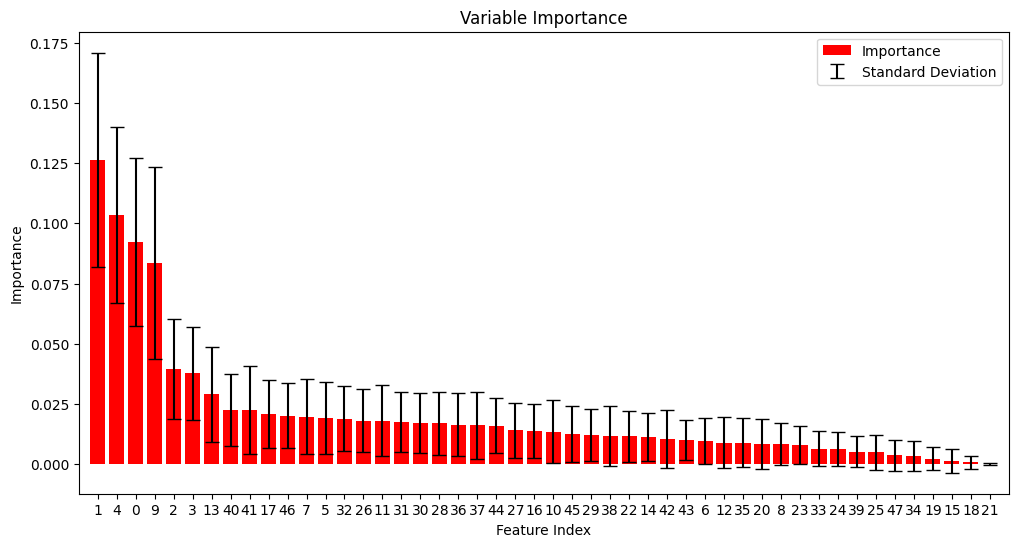

In [44]:
# Plot the Importance and Standard of Deviation
plt.figure(figsize=(12, 6))
plt.title("Variable Importance")

# Plot bars
bars = plt.bar(range(X_train.shape[1]), feature_importance_df['Importance'],
               color="r", align="center", label='Importance')
# Add error bars
plt.errorbar(range(X_train.shape[1]), feature_importance_df['Importance'], 
             yerr=std[indices], fmt='none', color='black', capsize=5, 
             label='Standard Deviation')
# Add labels
plt.xticks(range(X_train.shape[1]), feature_importance_df['Feature Index'])
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.legend()

plt.show()

In [45]:
# Select the top 60% of features
percentage = 0.6
num_features_to_include = int(percentage * len(feature_importance_df))

# Get the indices of the top features
selected_indices = np.array(feature_importance_df['Feature Index'].head(num_features_to_include).values)

# Keep the selected top features in X_train and X_test
X_train_filtered = X_train[:, selected_indices]
X_test_filtered = X_test[:, selected_indices]
print(f"After filtering, we have {X_train_filtered.shape[1]} feature variables")

# print the top features in X dataframe. 
df_temp = X.iloc[:, selected_indices].copy()
print("Features: ", df_temp.columns)
print("Targets: ", "Class")

After filtering, we have 28 feature variables
Features:  Index(['Attribute5', 'Attribute13', 'Attribute2', 'Attribute1_A14',
       'Attribute8', 'Attribute11', 'Attribute3_A34', 'Attribute14_A143',
       'Attribute15_A152', 'Attribute4_A43', 'Attribute19_A192',
       'Attribute1_A12', 'Attribute16', 'Attribute9_A93', 'Attribute6_A65',
       'Attribute3_A32', 'Attribute9_A92', 'Attribute7_A75', 'Attribute7_A73',
       'Attribute12_A122', 'Attribute12_A123', 'Attribute17_A173',
       'Attribute7_A72', 'Attribute4_A42', 'Attribute3_A31',
       'Attribute17_A174', 'Attribute7_A74', 'Attribute12_A124'],
      dtype='object')
Targets:  Class


In [46]:
# Create and fit the RandomForestClassifier with the top 60% parameters
model2 = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_depth=300,
                               min_samples_split=3,
                               min_samples_leaf=2)
# Fit the model
model2.fit(X_train_filtered, y_train)

# Predict and evaluate on the test set
y_pred_new = model2.predict(X_test_filtered)
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("Classification Report:\n", classification_report(y_test, y_pred_new))

Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.32      0.42        59
           1       0.76      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200



### Plot Confusion Matrix and ROC Curve for Evaluation

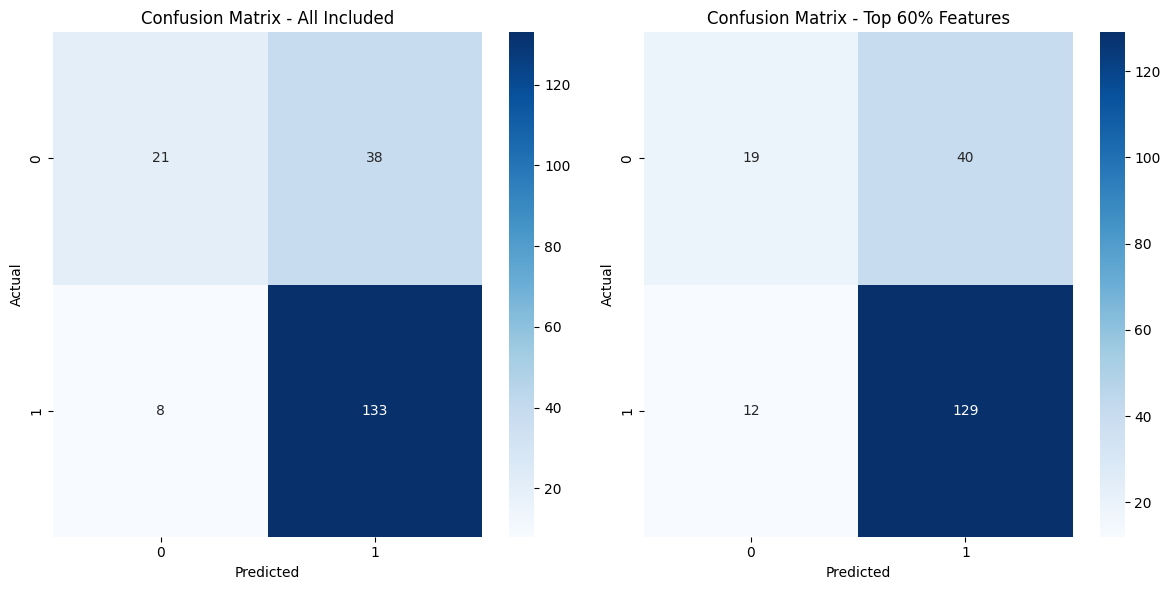

In [47]:
# Calculate confusion matrices
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_new)

# Plotting the confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, ax=ax1)
ax1.set_title('Confusion Matrix - All Included')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_, ax=ax2)
ax2.set_title('Confusion Matrix - Top 60% Features')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

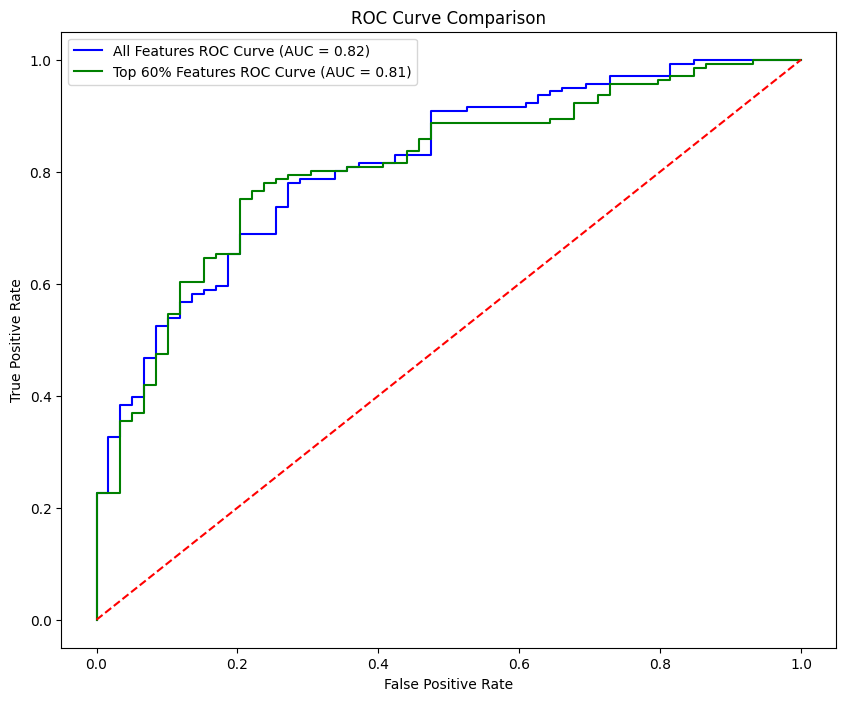

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC curve for Model 1
y_probs1 = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Model 1
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
auc1 = roc_auc_score(y_test, y_probs1)

# Predict probabilities for ROC curve for Model 2
y_probs2 = model2.predict_proba(X_test_filtered)[:, 1]

# Calculate ROC curve and AUC for Model 2
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
auc2 = roc_auc_score(y_test, y_probs2)

# Plot ROC curves for both models
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, color='blue', label=f'All Features ROC Curve (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', label=f'Top 60% Features ROC Curve (AUC = {auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

""" Note that, the more the curve goes higher than the red line, the better the model perform and vise versa.""";

## K-Nearest Neighbors and Naive Bayes

Natural Language Processiong (NLP) basic model is introduced. This model is built using both KNN and Naive Bayes and their performance is compared.  
The goal here is not to give comperhensive guide for NLP. It is just to show that ML models can be used to NLP tasks. Using Deep Learning is used more for NLP complex tasks. 

### Data Preprocessing 

We have used a file as our data. This file basically is a dataset of SMS messages and their type of spam or ham. The goal here is to devolop an NLP model to classfy messages. Preprocessing is done here to prepare the data directly for model fitting.  
The implemented methodology for preprocessing is as follows:
1. Load the data to a Dataframe.
2. Remove punctuations.
3. Perform word tokenization: This process is to convert a text to a list of words.
4. Convert words into lower case.
5. Stop word removal: This to remove words that are repeated so many times and not much differentiator in sentences.
6. Removed words with length less than three.
7. Perform part-of-speech (POS) tagging: This is to apply speech tags to words (ex. noun, verb, adjective, etc.). This step is not always necessary for all models. 
8. Perform lemmatization of words: This is to convert words to their root (ex. from "ate" to "eat").
9. Join tokens back to string: This is to convert list of words (tokens) back to text.
10. Convert the words into a vectorizer format and apply term frequency-inverse document frequency (TF-IDF) weights.

These preprocessing steps are performed using *nltk library*. 

In [49]:
# Import nltk library
import nltk

# Download necessary data for preprocessing
nltk.download('punkt_tab') # Ensure you have the necessary NLTK resources
nltk.download('stopwords') # used to remove stop words
nltk.download('averaged_perceptron_tagger_eng') # used for the POS tagger data step
nltk.download('wordnet') # used for lemmatization step

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mareai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mareai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\mareai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mareai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
file_path = r'D:\Programming\Practice Python\Data\NLP\SMS_Spam_Ham_Collection'

# Step 1: Read the file into a DataFrame
df_data = pd.read_csv(file_path, delimiter='\t', header=None, names=['type', 'SMS'], nrows=100) # use first 100 rows.

# convert type to binary; 1 is ham and 0 is spam
types = df_data['type'].unique()
if np.array_equal(types, np.array(['ham', 'spam'], dtype=object)):
    df_data['type'] = df_data['type'].map({'ham': 1, 'spam': 0})

df_data.head()

,type,SMS
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
print("Step 1: \n", df_data['SMS'].iloc[0])

# Step 2: Remove punctuations
import string
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df_data['SMS'] = df_data['SMS'].apply(remove_punctuations)
print("Step 2: \n", df_data['SMS'].iloc[0])

# Step 3: Perform word tokenization
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)
df_data['SMS'] = df_data['SMS'].apply(tokenize_text)
print("Step 3: \n", df_data['SMS'].iloc[0])

# Step 4: Convert all tokens to lowercase
df_data['SMS'] = df_data['SMS'].apply(lambda tokens: [word.lower() for word in tokens])
print("Step 4: \n", df_data['SMS'].iloc[0])

# Step 5: Remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]
df_data['SMS'] = df_data['SMS'].apply(remove_stop_words)
print("Step 5: \n", df_data['SMS'].iloc[0])

# Step 6: Filter out short tokens
def clean_tokens(tokens):
    # Remove tokens with length less than 3
    return [word for word in tokens if len(word) >= 3]
df_data['SMS'] = df_data['SMS'].apply(clean_tokens)
print("Step 6: \n", df_data['SMS'].iloc[0])

# Step 7: Apply POS tagging
from nltk import pos_tag
def pos_tagging(tokens):
    pos_tags = pos_tag(tokens)
    return pos_tags
df_data['SMS'] = df_data['SMS'].apply(pos_tagging)
print("Step 7: \n", df_data['SMS'].iloc[0])

# Step 8: Perform lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
# Function to perform lemmatization
def lemmatization(pos_tags):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    
    for word, nltk_tag in pos_tags:
        # Map NLTK POS tag to WordNet POS tag
        wordnet_pos = get_wordnet_pos(nltk_tag) or wordnet.NOUN  # Default to noun if no POS tag found
        # Lemmatize the word using the POS tag
        lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_tokens.append(lemmatized_word)
    return lemmatized_tokens
# Apply lemmatization
df_data['SMS'] = df_data['SMS'].apply(lemmatization)
print("Step 8: \n", df_data['SMS'].iloc[0])

# Step 9: Convert the list of tokens in 'SMS' column back to strings
df_data['SMS'] = df_data['SMS'].apply(lambda tokens: ' '.join(tokens))
print("Step 9: \n", df_data['SMS'].iloc[0])

# Step 10: Apply Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df_data['SMS'])

""" This code will convert our text to a Compressed Sparse Row (CSR) matrix object. TF-IDF helps in 
    transforming text data into numerical features that can be used for machine learning models. """;
# print("Step 10: \n", X[0].toarray()) # use this line to see how the first line is converted to numerical values 

Step 1: 
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Step 2: 
 Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
Step 3: 
 ['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore', 'wat']
Step 4: 
 ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
Step 5: 
 ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
Step 6: 
 ['jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'got', 'amore', 'wat']
Step 7: 
 [('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('great', 'JJ'), ('world', 'NN'), ('buffet', 'NN'), ('

In [52]:
# Step 11: Perform Data Splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_data['type'], test_size=0.2, random_state=42)

### Fit the ML Models

In [53]:
# Build KNN ML Model 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can choose different k values
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [54]:
# Build Naive Bayes ML Model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred_nb = nb_model.predict(X_test)

### Evaluate the Models 

In [55]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_test, y_pred):
    # Calculate the metrics 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Display evaluation metrics as percentages
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    print()

# Print the classification report for KNN
print("KNN Model:")
evaluate(y_test, y_pred_knn)

# Print the classification report for Naive Bayes
print("Naive Bayes Models:")
evaluate(y_test, y_pred_nb)

KNN Model:
Accuracy: 80.00%
Precision: 100.00%
Recall: 78.95%
F1 Score: 88.24%

Naive Bayes Models:
Accuracy: 95.00%
Precision: 95.00%
Recall: 100.00%
F1 Score: 97.44%



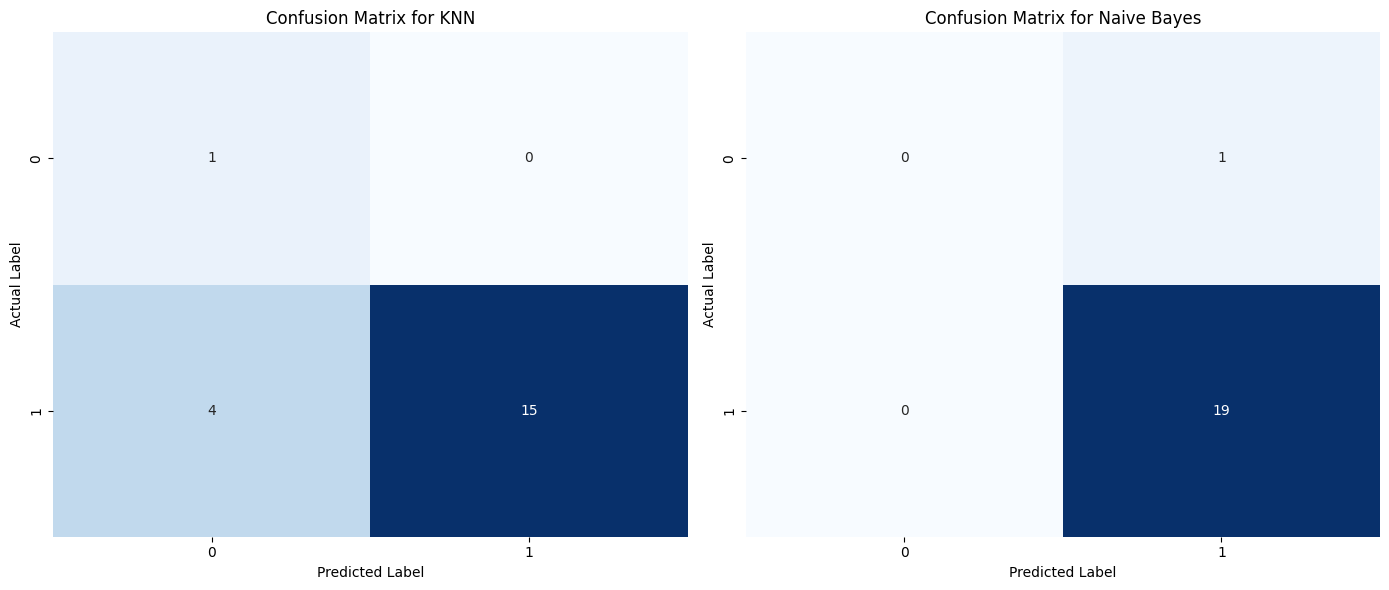

In [56]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix for KNN')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

# Plot the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix for Naive Bayes')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Examine the model with actual text

In [57]:
def preprocess_text(text):
    def remove_punctuations(text):
        return text.translate(str.maketrans('', '', string.punctuation))
    
    def tokenize_text(text):
        return word_tokenize(text)
    
    def remove_stop_words(tokens):
        stop_words = set(stopwords.words('english'))
        return [word for word in tokens if word not in stop_words]
    
    def clean_tokens(tokens):
        return [word for word in tokens if len(word) >= 3]
    
    def get_wordnet_pos(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None
    
    def lemmatization(pos_tags):
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = []
        for word, nltk_tag in pos_tags:
            wordnet_pos = get_wordnet_pos(nltk_tag) or wordnet.NOUN
            lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)
            lemmatized_tokens.append(lemmatized_word)
        return lemmatized_tokens

    text = remove_punctuations(text)
    tokens = tokenize_text(text)
    tokens = [word.lower() for word in tokens]
    tokens = remove_stop_words(tokens)
    tokens = clean_tokens(tokens)
    pos_tags = pos_tag(tokens)
    tokens = lemmatization(pos_tags)
    return ' '.join(tokens)


In [58]:
# Examine a model with a message
input_string = "give your bank card detail. transfer 1000 dolar and recieve more "

processed_string = preprocess_text(input_string)
print("Processed String:", processed_string, '\n')

# Preprocess the string
new_string_vectorized = tfidf_vectorizer.transform([processed_string])
predicted_class_knn = knn_model.predict(new_string_vectorized)
predicted_class_nb = nb_model.predict(new_string_vectorized)

label_mapping = {0: 'spam', 1: 'ham'}
predicted_class_knn_labels = [label_mapping[label] for label in predicted_class_knn]
predicted_class_nb_labels = [label_mapping[label] for label in predicted_class_nb]

print(f"Prediction using KNN: {predicted_class_knn_labels[0]}")
print(f"Prediction using Naive Bayes: {predicted_class_nb_labels[0]}")

Processed String: give bank card detail transfer 1000 dolar recieve 

Prediction using KNN: spam
Prediction using Naive Bayes: ham


## Support Vector Machine (SVM)

**Support Vector Machines (SVM)** is a family of models that includes various algorithms and techniques for classification and regression. The core idea is to find the hyperplane that best separates different classes in the feature space.

In this context, we are dealing with a classification task where the goal is to determine which digit a 64-pixel grid is displaying. For this task, we use a Support Vector Classifier (SVC), which is a type of SVM specifically designed for classification problems.

We can evaluate our SVC model using three different types of kernel functions:

1. Linear Kernel: This kernel corresponds to the maximum margin classifier, which aims to find a hyperplane that maximizes the margin between classes in a linear fashion.
2. Polynomial Kernel: This kernel allows for non-linear classification by considering polynomial combinations of the input features.
3. RBF (Radial Basis Function) Kernel: This kernel is also known as the Gaussian kernel and can handle non-linearity by mapping input features into a high-dimensional space.

*Note that SVMs can be used for regression tasks using Support Vector Regression (SVR) model*

In [59]:
# Extract the data
""" This data is a digit data from 0 to 9 which are based in a 64 pixel grid"""
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

print("Name:", optical_recognition_of_handwritten_digits.metadata['name'], 
      "\nlink:", optical_recognition_of_handwritten_digits.metadata['repository_url'])
print("Features: ", X.columns)
print("Targets: ", y.columns)

Name: Optical Recognition of Handwritten Digits 
link: https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits
Features:  Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Attribute37', 'Attribute38',
       'Attribute39', 'Attribute40', 'Attribute41', 'Attribute42',
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attri

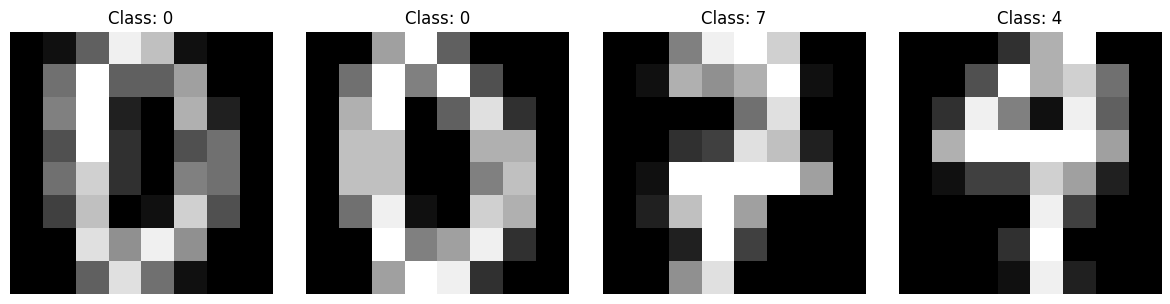

In [60]:
# Plot Numbers from the data as an exampel 
num_rows = 1 # increase number of rows to plot if needed

num_cols = 4 # change number of grid columns if needed
num_images = num_rows * num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows*3))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

# Plot each image in the grid
for i in range(num_images):
    index = i
    image_data = X.iloc[index].values
    image_reshaped = image_data.reshape(8, 8)
    
    axes[i].imshow(image_reshaped, cmap='gray')
    axes[i].set_title(f'Class: {y.iloc[index, 0]}')
    axes[i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [61]:
# Split the dataset into training and testing sets

# flatten the y dataframe
y = y['class'].values
y = y.ravel()

# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # using 20% for testing

In [62]:
# Build the SVC models 
from sklearn.svm import SVC

# Build SVC with linear kernel (Maximum margin classifier)
svc_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear.fit(x_train, y_train)
y_pred_linear = svc_linear.predict(x_test)

# Build SVC with Polynomial kernel
svc_poly = SVC(kernel='poly', C=1.0, degree=2)
svc_poly.fit(x_train, y_train)
y_pred_poly = svc_poly.predict(x_test)

# Build SVC with RBF kernel
""" After Several Testing, without scaling, RBF model performance was too poor. so a scaling step is used here"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svc_rbf = SVC(kernel='rbf', C=1.0, gamma=0.05)
svc_rbf.fit(x_train_scaled, y_train)
y_pred_rbf = svc_rbf.predict(x_test_scaled)

In [63]:
# Evaluate the model with printing accuracy 
from sklearn.metrics import accuracy_score

print("Accuracy Score Linear:")
print(accuracy_score(y_test, y_pred_linear))
print("\nAccuracy Score Poly:")
print(accuracy_score(y_test, y_pred_poly))
print("\nAccuracy Score RBF:")
print(accuracy_score(y_test, y_pred_rbf))

Accuracy Score Linear:
0.9768683274021353

Accuracy Score Poly:
0.9875444839857651

Accuracy Score RBF:
0.9813167259786477


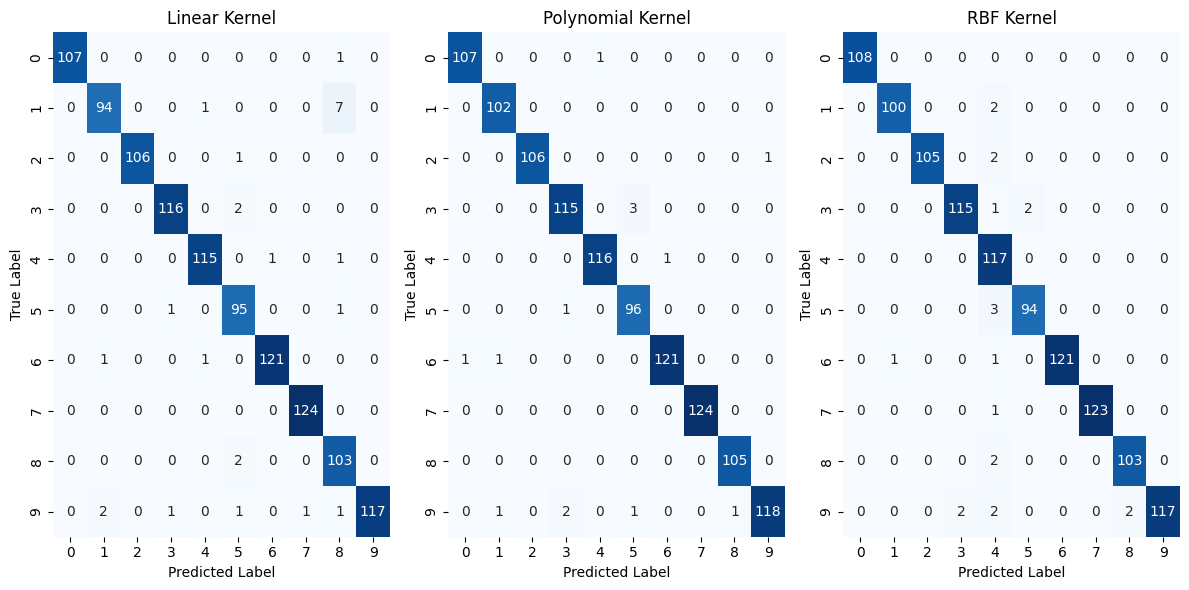

In [64]:
# plot the confusion matrix 

from sklearn.metrics import confusion_matrix

# Define the models and their predictions
models = {
    'Linear Kernel': (svc_linear, y_pred_linear),
    'Polynomial Kernel': (svc_poly, y_pred_poly),
    'RBF Kernel': (svc_rbf, y_pred_rbf)
}

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for ax, (title, (model, y_pred)) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

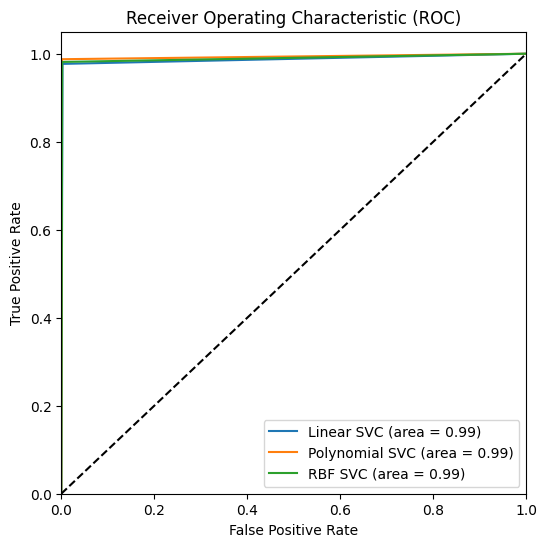

In [65]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_linear_bin = label_binarize(y_pred_linear, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_poly_bin = label_binarize(y_pred_poly, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_rbf_bin = label_binarize(y_pred_rbf, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

def plot_roc_curve(y_test_bin, y_pred_bin, model_name, ax):
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

fig, ax = plt.subplots(figsize=(6, 6))

plot_roc_curve(y_test_bin, y_pred_linear_bin, 'Linear SVC', ax)
plot_roc_curve(y_test_bin, y_pred_poly_bin, 'Polynomial SVC', ax)
plot_roc_curve(y_test_bin, y_pred_rbf_bin, 'RBF SVC', ax)

ax.plot([0, 1], [0, 1], 'k--')  # Diagonal line
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)')
ax.legend(loc='lower right')

plt.show()


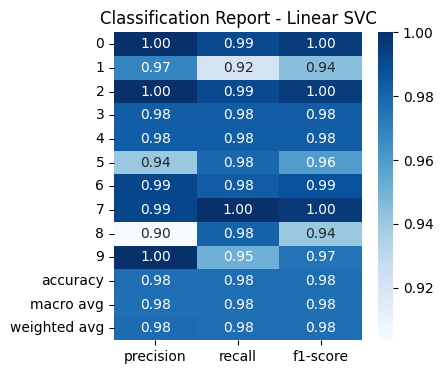

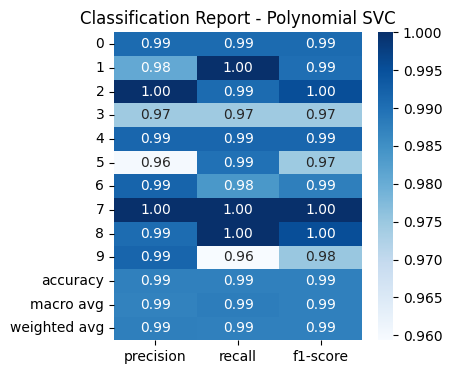

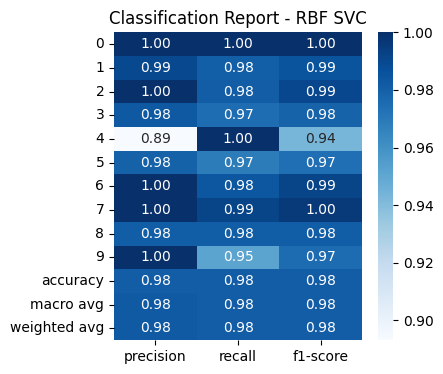

In [66]:
# plot classification report
from sklearn.metrics import classification_report

def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    df_report = pd.DataFrame(report).transpose()

    plt.figure(figsize=(4, 4))
    sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f')
    plt.title(title)
    plt.show()

plot_classification_report(y_test, y_pred_linear, 'Classification Report - Linear SVC')
plot_classification_report(y_test, y_pred_poly, 'Classification Report - Polynomial SVC')
plot_classification_report(y_test, y_pred_rbf, 'Classification Report - RBF SVC')


# Clustring Models

## Unsupervised Learning Models

We have a dataset with 10 features, each representing a review score ranging from 0 to 4. Our goal is to cluster the data into five categories: Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0). Since the dataset contains float values, we will first calculate the average of each review and then divide these averages into five equal groups corresponding to the ratings mentioned above. This method will make a rough classification for our data using Average Method. 

We will build a model using K-means Clustering. To evaluate our clustering model, we will compare it to the above basic average-based method.  

Additionally, we will explore two dimensionality reduction techniques: Principal Component Analysis (PCA) and Singular Value Decomposition (SVD). Both methods are used to reduce the dimensionality of the dataset, which can help in visualizing the data. We will build a K-means Clustering model as well to examine their effect on the model performance.

In [67]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
travel_reviews = fetch_ucirepo(id=484) 
  
# data (as pandas dataframes) 
X = travel_reviews.data.features 
y = travel_reviews.data.targets

print("Name:", travel_reviews.metadata['name'], "\nlink:", travel_reviews.metadata['repository_url'])
print(f"We have {X.shape[0]} rows with {X.shape[1]} features variables and {0} target variable")
print("Features: ", X.columns)
print("Targets: ", "None")

Name: Travel Reviews 
link: https://archive.ics.uci.edu/dataset/484/travel+reviews
We have 980 rows with 10 features variables and 0 target variable
Features:  Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10'],
      dtype='object')
Targets:  None


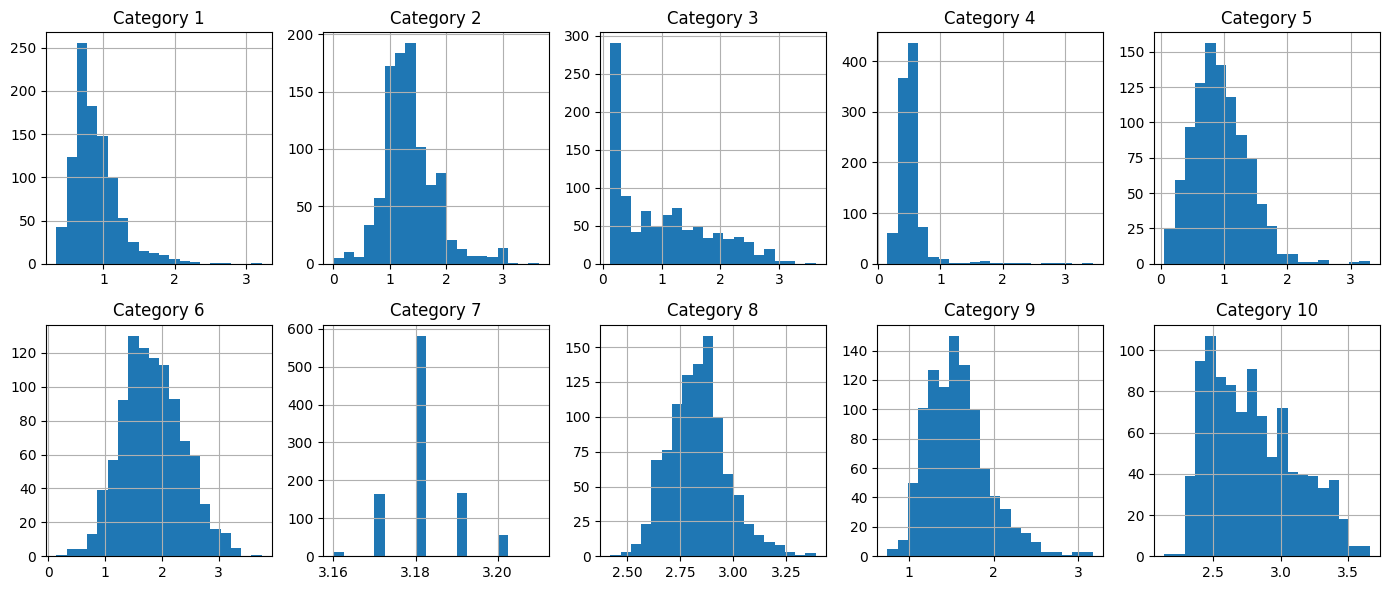

In [68]:
# Make plots to visualize features data distribution 
""" This data is for travels reviews. We can see that the data is distributed from 0 to 4 representing:
    Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0). """

# Number of categories
num_categories = X.shape[1]

# Create a grid of subplots with 3 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each category's histogram
for i, column in enumerate(X.columns):
    X[column].hist(ax=axes[i], bins=20)
    axes[i].set_title(column)
    axes[i].grid(True)
    
# Remove any empty subplots
for i in range(num_categories, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Average Method

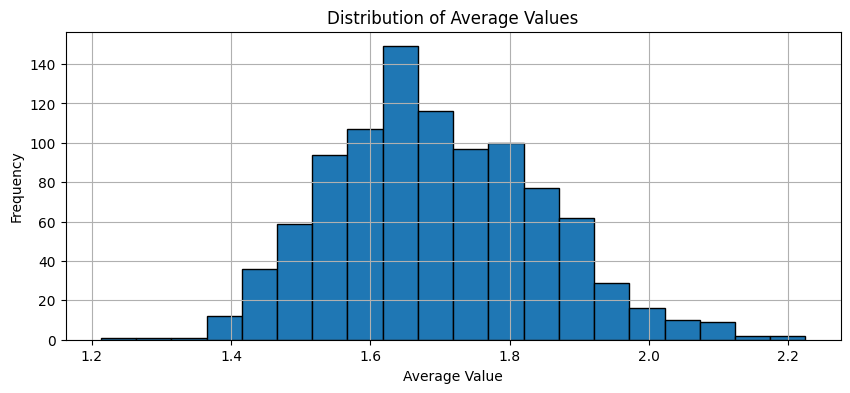

In [69]:
# Calculate the average value across all categories
X_new = pd.DataFrame()
X_new['average'] = X.mean(axis=1)

# Plot the distribution of the 'average' column
plt.figure(figsize=(10, 4))
X_new['average'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Average Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Values')
plt.grid(True)
plt.show()

In [70]:
# Divide the 'average' column into 5 equal-width bins
X_new['binned'] = pd.cut(X_new['average'], bins=5, labels=['Terrible', 'Poor', 'Average', 'Very Good', 'Excellent'])

# Calculate the frequency of each group
group_counts = X_new['binned'].value_counts().sort_index()

# Print each rating and its frequency
print("Rating and Frequency:")
for rating, frequency in group_counts.items():
    print(f"{rating}: {frequency}")

Rating and Frequency:
Terrible: 15
Poor: 296
Average: 462
Very Good: 184
Excellent: 23


### K-means Clustering Model

In [71]:
# Use K-means Clustering Directly
from sklearn.cluster import KMeans

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
clusters_kmeans = kmeans.labels_

# Map Clusters to Ratings
cluster_mapping = {0: 'Terrible', 1: 'Poor', 2: 'Average', 3: 'Very Good', 4: 'Excellent'}
cluster_labels = [cluster_mapping[label] for label in clusters_kmeans]
cluster_counts = pd.Series(cluster_labels).value_counts()
sorted_cluster_counts = cluster_counts[['Terrible', 'Poor', 'Average', 'Very Good', 'Excellent']]

# Print each category and the number of values inside it
for category, count in sorted_cluster_counts.items():
    print(f"{category}: {count} reviews")

Terrible: 199 reviews
Poor: 156 reviews
Average: 179 reviews
Very Good: 279 reviews
Excellent: 167 reviews


Terrible: 191 reviews
Poor: 158 reviews
Average: 193 reviews
Very Good: 302 reviews
Excellent: 136 reviews


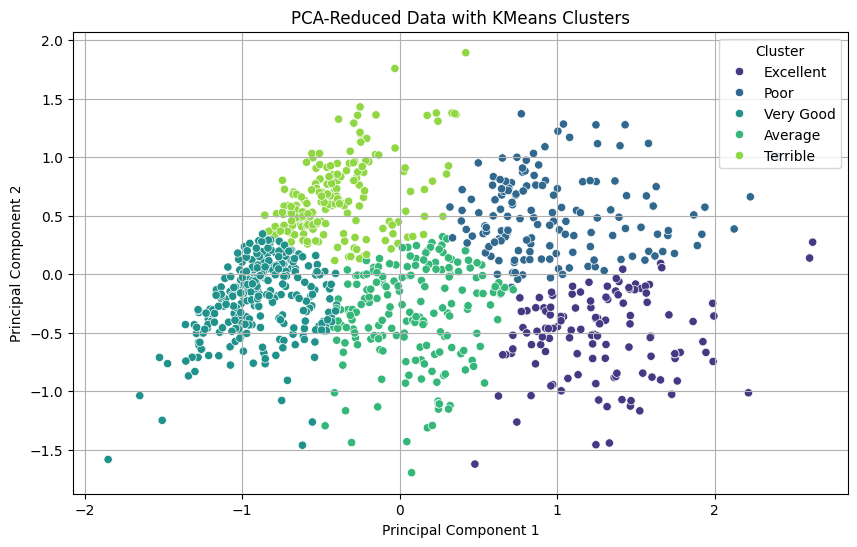

In [72]:
# Apply PCA before Kmeans
""" This method will reduce the axes to two dimensions. We can see how this data can be plotted using a scatter plot.
    We can also see how this data is classified. """
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
clusters_pca = kmeans.labels_

# Map Clusters to Ratings
cluster_mapping = {0: 'Terrible', 1: 'Poor', 2: 'Average', 3: 'Very Good', 4: 'Excellent'}
cluster_labels = [cluster_mapping[label] for label in clusters_pca]
cluster_counts = pd.Series(cluster_labels).value_counts()
sorted_cluster_counts_pca = cluster_counts[['Terrible', 'Poor', 'Average', 'Very Good', 'Excellent']]

# Print each category and the number of values inside it
for category, count in sorted_cluster_counts_pca.items():
    print(f"{category}: {count} reviews")

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')

# Add titles and labels
plt.title('PCA-Reduced Data with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

Terrible: 255 reviews
Poor: 133 reviews
Average: 189 reviews
Very Good: 223 reviews
Excellent: 180 reviews


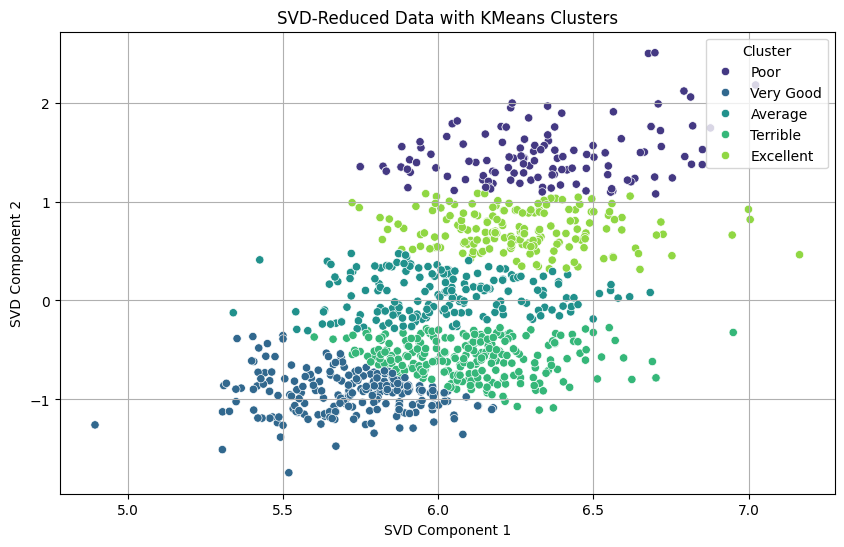

In [73]:
# Apply SVD before Kmeans
""" This method is also used to reduce dimensions into two deminsions. We can also see how Kmeans classify our results
    in the scatter plot"""

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

# Apply SVD
svd = TruncatedSVD(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_svd = svd.fit_transform(X)

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_svd)
clusters_svd = kmeans.labels_

# Map Clusters to Ratings
cluster_mapping = {0: 'Terrible', 1: 'Poor', 2: 'Average', 3: 'Very Good', 4: 'Excellent'}
cluster_labels = [cluster_mapping[label] for label in clusters_svd]
cluster_counts = pd.Series(cluster_labels).value_counts()
sorted_cluster_counts_svd = cluster_counts[['Terrible', 'Poor', 'Average', 'Very Good', 'Excellent']]

# Print each category and the number of values inside it
for category, count in sorted_cluster_counts_svd.items():
    print(f"{category}: {count} reviews")

# Create a scatter plot of the SVD-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=cluster_labels, palette='viridis', legend='full')

# Add titles and labels
plt.title('SVD-Reduced Data with KMeans Clusters')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Cluster', loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

***Compare Average method vs Kmeans Model***

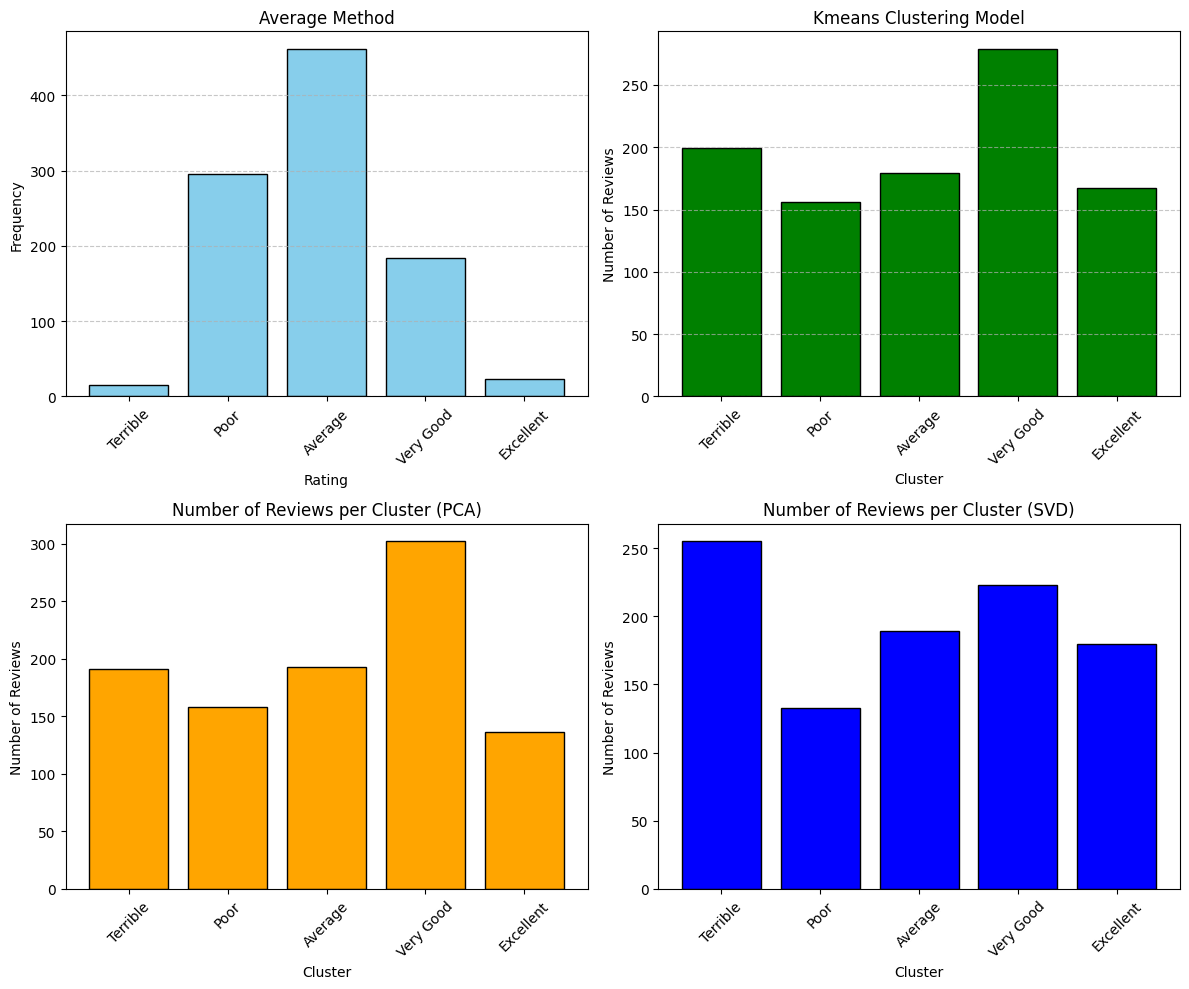

In [74]:
# Create a grid of 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Plot for the frequency of each rating
axs[0, 0].bar(group_counts.index, group_counts.values, color='skyblue', edgecolor='black')
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Average Method')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for the number of reviews per cluster
axs[0, 1].bar(sorted_cluster_counts.index, sorted_cluster_counts.values, color='green', edgecolor='black')
axs[0, 1].set_xlabel('Cluster')
axs[0, 1].set_ylabel('Number of Reviews')
axs[0, 1].set_title('Kmeans Clustering Model')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot for the number of reviews per cluster (PCA)
axs[1, 0].bar(sorted_cluster_counts_pca.index, sorted_cluster_counts_pca.values, color='orange', edgecolor='black')
axs[1, 0].set_xlabel('Cluster')
axs[1, 0].set_ylabel('Number of Reviews')
axs[1, 0].set_title('Number of Reviews per Cluster (PCA)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot for the number of reviews per cluster (SVD)
axs[1, 1].bar(sorted_cluster_counts_svd.index, sorted_cluster_counts_svd.values, color='blue', edgecolor='black')
axs[1, 1].set_xlabel('Cluster')
axs[1, 1].set_ylabel('Number of Reviews')
axs[1, 1].set_title('Number of Reviews per Cluster (SVD)')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

***While the number of reviews in each cluster is similar between K-Means, PCA, and SVD, this does not necessarily mean that the predictions (i.e., the assignment of data points to clusters) are the same.*** For example, even if the number of "Excellent" reviews is the same between K-Means and PCA, the specific data points assigned to the "Excellent" cluster might differ between these methods. Therefore, a similar number of reviews across clusters does not imply identical clustering or that the same features are consistently rated as "Excellent" across different methods. This can be better understood by analyzing a scatter plot to compare how the features are clustered across these different methods.

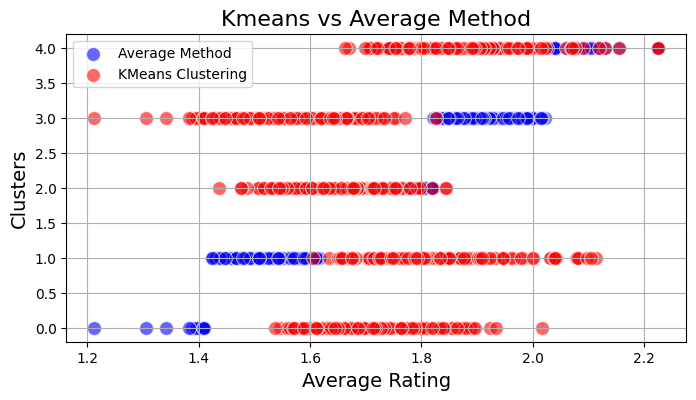

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the binned labels to their corresponding numerical values
binned_numeric = X_new['binned'].map({'Terrible': 0, 'Poor': 1, 'Average': 2, 'Very Good': 3, 'Excellent': 4})

# Create a scatter plot to compare K-Means clusters with average-based binning
plt.figure(figsize=(8, 4))

# Scatter plot of 'average' vs binned categories (numerical)
sns.scatterplot(x=X_new['average'], y=binned_numeric, color='blue', label='Average Method', s=100, alpha=0.6)

# Scatter plot of 'average' vs KMeans clusters (numerical)
sns.scatterplot(x=X_new['average'], y=clusters_kmeans, color='red', label='KMeans Clustering', s=100, alpha=0.6)

# Add title and labels
plt.title('Kmeans vs Average Method', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

plt.gca().invert_yaxis() # invert y-axis to be from 0 to 4
plt.grid(True)
plt.legend()
plt.show()

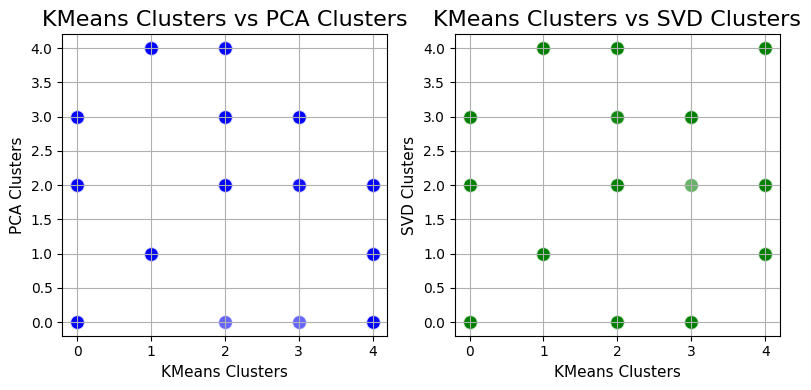

In [76]:
plt.figure(figsize=(8, 4))

# Scatter plot: clusters_kmeans vs clusters_pca
plt.subplot(1, 2, 1)
sns.scatterplot(x=clusters_kmeans, y=clusters_pca, color='blue', s=100, alpha=0.6)
plt.title('KMeans Clusters vs PCA Clusters', fontsize=16)
plt.xlabel('KMeans Clusters', fontsize=11)
plt.ylabel('PCA Clusters', fontsize=11)
plt.grid(True)

# Scatter plot: clusters_kmeans vs clusters_svd
plt.subplot(1, 2, 2)
sns.scatterplot(x=clusters_kmeans, y=clusters_svd, color='green', s=100, alpha=0.6)
plt.title('KMeans Clusters vs SVD Clusters', fontsize=16)
plt.xlabel('KMeans Clusters', fontsize=11)
plt.ylabel('SVD Clusters', fontsize=11)
plt.grid(True)

plt.tight_layout()
plt.show()

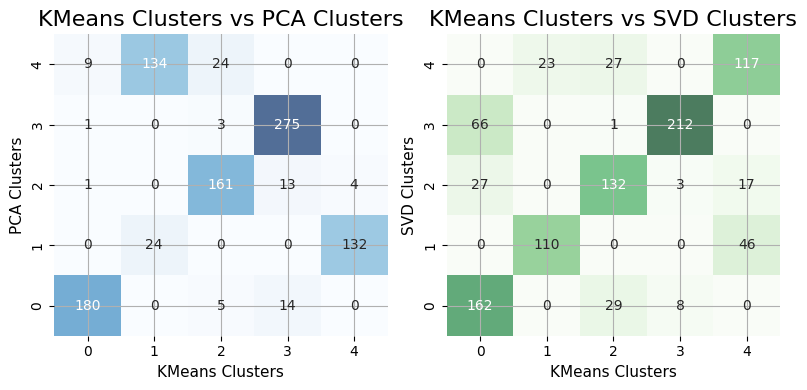

In [77]:
# Use Heatmap for more detailed visualization

# Generate the confusion matrices (or count matrices) for heatmaps
kmeans_vs_pca = np.zeros((max(clusters_kmeans) + 1, max(clusters_pca) + 1))
kmeans_vs_svd = np.zeros((max(clusters_kmeans) + 1, max(clusters_svd) + 1))

for k, p in zip(clusters_kmeans, clusters_pca):
    kmeans_vs_pca[k, p] += 1

for k, s in zip(clusters_kmeans, clusters_svd):
    kmeans_vs_svd[k, s] += 1

plt.figure(figsize=(8, 4))

# Scatter plot with heatmap: clusters_kmeans vs clusters_pca
plt.subplot(1, 2, 1)
sns.heatmap(kmeans_vs_pca, cmap='Blues', alpha=0.7, cbar=False, annot=True, fmt='.0f')
plt.title('KMeans Clusters vs PCA Clusters', fontsize=16)
plt.xlabel('KMeans Clusters', fontsize=11)
plt.ylabel('PCA Clusters', fontsize=11)
plt.gca().invert_yaxis() # invert y-axis to be from 0 to 4
plt.grid(True)

# Scatter plot with heatmap: clusters_kmeans vs clusters_svd
plt.subplot(1, 2, 2)
sns.heatmap(kmeans_vs_svd, cmap='Greens', alpha=0.7, cbar=False, annot=True, fmt='.0f')
plt.title('KMeans Clusters vs SVD Clusters', fontsize=16)
plt.xlabel('KMeans Clusters', fontsize=11)
plt.ylabel('SVD Clusters', fontsize=11)
plt.gca().invert_yaxis() # invert y-axis to be from 0 to 4
plt.grid(True)

plt.tight_layout()
plt.show()